<a href="https://colab.research.google.com/github/Dhanashree-31/Dhanashree-31/blob/main/recipe_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# my code


In [ ]:
import pandas as pd
import numpy as np

from ast import literal_eval
from collections import Counter
from tqdm.auto import tqdm
import warnings

pd.set_option('display.max_colwidth', 1000)
warnings.filterwarnings("ignore")
tqdm.pandas()

dataset = pd.read_csv("/content/updated_dataset.csv")

# prompt: Using dataframe dataset: recipe recommendation system using the ingredients

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Get the ingredients from the dataset
ingredients = dataset['ingredients']

# Create a bag-of-words representation of the ingredients
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(ingredients)

# Compute the cosine similarity between each pair of ingredients
similarities = cosine_similarity(X)

# Find the most similar ingredients to the given ingredient
def find_similar_ingredients(ingredient):
  # Get the index of the ingredient in the vectorizer's vocabulary
  ingredient_index = vectorizer.vocabulary_.get(ingredient)

# prompt: Using dataframe X_test: testing by given multiple input

dataset[dataset['ingredients'].str.contains('Ghee')]


In [ ]:
dataset.columns


Index(['RecipeID', 'name', 'image_url', 'description', 'cuisine', 'course',
       'diet', 'prep_time', 'ingredients', 'instructions', 'recipe'],
      dtype='object')

In [ ]:
df = pd.read_csv("/content/updated_dataset.csv")


from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


# Create a TF-IDF vectorizer to convert ingredients into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['ingredients'])

# Calculate cosine similarity between recipes
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(name, cosine_sim_matrix, df):
    if df.empty:
        return []
    else:
        # Get the index of the recipe
        if len(df[df['name'] == name]) > 0:
            idx = df[df['name'] == name].index[0]
        # Get the pairwise similarity scores with other recipes
            sim_scores = cosine_sim_matrix[idx]
        # Sort the recipes by similarity score
            sorted_indices = np.argsort(sim_scores)[::-1]
        # Get the indices of the top k most similar recipes
            top_k_indices = sorted_indices[:k]
        # Get the names of the top k most similar recipes
            top_k_names = dataset['name'].iloc[top_k_indices]
        # Return the names of the top k most similar recipes
            return top_k_names

# Example usage
recipe_to_recommend = 'Semiya','curd'
recommendations = get_recommendations(recipe_to_recommend, cosine_sim, train_data)
# Display the recommendations
print(f"Recommended recipes for '{recipe_to_recommend}':")
print(recommendations)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Sample dataset (replace with your own dataset)
df = pd.read_csv('/content/updated_dataset.csv')

# User input (ingredients)
user_input = 'chicken, vegetables, soy sauce'

# Add user input to the dataset with a proper recipe name
user_data = {'RecipeID': [0], 'RecipeName': ['User Input'], 'ingredients': [user_input]}
user_df = pd.concat([df, pd.DataFrame(user_data)], ignore_index=True)

# Create a TF-IDF vectorizer to convert ingredients into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(user_df['ingredients'])

# Calculate cosine similarity between recipes and user input
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Get the similarity scores for the user input
user_input_similarity = cosine_sim[-1, :-1]

# Get the indices of recipes sorted by similarity scores
sorted_indices = user_input_similarity.argsort()[::-1]

# Recommend top 3 recipes
top_recommendations = user_df['RecipeName'].iloc[sorted_indices[:3]]

# Display the recommendations
print(f"Top 3 recommended recipes based on input ingredients:")
print(top_recommendations)


Top 3 recommended recipes based on input ingredients:
2562    NaN
455     NaN
2208    NaN
Name: RecipeName, dtype: object


# New Section

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
recipes_df = pd.read_csv('updated_dataset.csv')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a matrix of TF-IDF features for each recipe
tfidf_matrix = vectorizer.fit_transform(recipes_df['ingredients'])

# Compute the cosine similarity between all recipe pairs
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to get the top N similar recipes for a given list of ingredients
def get_similar_recipes(user_ingredients, N=10):
    # Convert the user's input to a Python list of ingredients
    user_ingredients = [item.strip() for item in user_ingredients]

    # Create a temporary DataFrame with the user's ingredients
    temp_df = pd.DataFrame({'ingredients': [' '.join(user_ingredients)]})

    # Compute the TF-IDF features for the user's ingredients
    user_tfidf_matrix = vectorizer.transform(temp_df['ingredients'])

    # Compute the cosine similarity between all recipe pairs, including the user's ingredients
    user_similarity = cosine_similarity(user_tfidf_matrix, tfidf_matrix)

    # Define the top N similar recipes based on cosine similarity
    sim_scores = list(enumerate(user_similarity[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recipe_indices = [i[0] for i in sim_scores[1:N+1]]
    top_n_recipes = recipes_df.iloc[recipe_indices]

    return top_n_recipes

# Example usage
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
get_similar_recipes(user_ingredients)


,RecipeID,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
2052,2053,Kerala Chicken Puttu Recipe,https://www.archanaskitchen.com/images/archanaskitchen/1-Author/jyothir/Kerala_Chicken_Puttu.jpg,"Puttu is unique to Kerala. It is one of the staple dish prepared for breakfast in many households on day to day basis. Being steamed and prepared without oil puts the ‘puttu’ in the list of healthy, non-fat dishes. There are many variations to this dish; one of them is chicken Puttu. A true delightful breakfast for all non veg lovers.",Kerala Recipes,South Indian Breakfast,Non Vegeterian,Total in 40 M,"For chicken masala 200 grams Chicken breasts 2 Onions , finely chopped 2 Tomatoes , finely chopped 3 Green Chillies , slit 1 teaspoon Whole Black Peppercorns , crushed 1 teaspoon Coriander Powder (Dhania) 2 teaspoon Red Chilli powder Salt , to taste 1 tablespoon Coconut Oil Curry leaves , Few For puttu 1/2 cup Rice puttu , flour 2 tablespoons Water Salt , a pinch 3/4 cup Fresh coconut , grated","To begin making the Kerala Chicken Puttu recipe, wash chicken breast well, season with salt and pepper powder and cook in little water until it’s cooked. Remove the cooked chicken from water and cut into small pieces.Heat oil in a heavy bottomed pan, add the chopped onions and green chilies. When it turns golden brown, add chopped tomato and salt. Cook till the tomato becomes soft.Add crushed pepper corns, red chilli powder and coriander powder, mix well.Add a tablespoon of water and cook for a minute.Add cooked chicken pieces to the mixture along with the water in which chicken was cooked. Continue to cook and let the masala turn dry completely. Garnish with little curry leaves and set aside to cool.Mix puttu flour with little salt, mix well. Add little water at a time and mix. Do that until the puttu mixture has consistency of breadcrumbs.Bring water to boil in a puttu maker. Add a layer of fresh grated coconut in the maker, spoon in chicken masala mix, then add the puttu flour. ..."
1493,1494,Classic Indian Sliced Salad Recipe,https://www.archanaskitchen.com/images/archanaskitchen/0-Archanas-Kitchen-Recipes/2019/Classic_Indian_Sliced_Salad_Recipe_Video_6_1600.jpg,"Classic Indian Sliced Salad Recipe is a simple side dish or an accompaniment recipe to the main meals. Indian meal plate, especially lunch or dinner is incomplete with simple sliced veggies that are fresh and locally available.",Indian,Side Dish,Vegetarian,Total in 10 M,"1 Cucumber 1 Carrots (Gajjar) 1 Tomatoes , sliced 1 Onion , sliced Lemon juice , to taste Salt , to taste Black pepper corns , crushed","To begin making the Classic Indian Sliced Salad Recipe, wash and wipe all the veggies clean. Peel the skin of the cucumber and the carrot. Cut the tomato and onion into slices and have them ready.Attach the thin slicing blade into the masterchef jar. Close the lid of the Jar. Add the cucumber into the spout of the lid and turn on the processor to make thin cucumber slices.Once done transfer the cucumbers into a bowl and keep aside.Next add the carrots into the spout of the lid and turn on the processor to make thin carrot slices. Take a serving plate and arrange the carrots at the edge of the plate .Then arrange the sliced cucumbers followed by the tomato slices and the onion slices in serving plate. Sprinkle some salt and some crushed pepper and squeeze some lemon juice over the sliced vegetables and serve. Serve Classic Indian Sliced Salad Recipe along with a Smoked Dal Makhani, Palak Paneer Recipe, Jeera Rice or Tawa Paratha for a special weeknight dinner. You can also have thi..."
2848,2849,Thalassery Chicken Biriyani Recipe,https://www.archanaskitchen.com/images/archanaskitchen/1-Author/sibyl_sunitha/Thalassery_Chicken_Biriyani_Recipe_.jpg,Thalassery Chicken Biriyani Recipe is a part of Kerala cuisine which is known for its biryani. Thalassery cuisine has it influence from the Arab and mughlai cooking that especially famous in the Muslim communi

In [ ]:

# Load the dataset
recipes_df = pd.read_csv('updated_dataset.csv')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a matrix of TF-IDF features for each recipe
tfidf_matrix = vectorizer.fit_transform(recipes_df['ingredients'])

# Compute the cosine similarity between all recipe pairs
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to get the top N similar recipes for a given list of ingredients
def get_similar_recipes(user_ingredients, N=10):
    # Convert the user's input to a Python list of ingredients
    user_ingredients = [item.strip() for item in user_ingredients]

    # Create a temporary DataFrame with the user's ingredients
    temp_df = pd.DataFrame({'ingredients': [' '.join(user_ingredients)]})

    # Compute the TF-IDF features for the user's ingredients
    user_tfidf_matrix = vectorizer.transform(temp_df['ingredients'])

    # Compute the cosine similarity between all recipe pairs, including the user's ingredients
    user_similarity = cosine_similarity(user_tfidf_matrix, tfidf_matrix)

    # Define the top N similar recipes based on cosine similarity
    sim_scores = list(enumerate(user_similarity[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recipe_indices = [i[0] for i in sim_scores[1:N+1]]
    top_n_recipes = recipes_df.iloc[recipe_indices]

    return top_n_recipes


# Example usage
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
N = 10
top_n_recipes = get_similar_recipes(user_ingredients, N)

# Compute the precision and recall of the model
relevant_recipes = recipes_df[recipes_df['ingredients'].str.contains('|'.join(user_ingredients))]
relevant_recipe_ids = set(relevant_recipes['RecipeID'])
recommended_recipe_ids = set(top_n_recipes['RecipeID'])
true_positives = len(recommended_recipe_ids.intersection(relevant_recipe_ids))
false_positives = len(recommended_recipe_ids - relevant_recipe_ids)
false_negatives = len(relevant_recipe_ids - recommended_recipe_ids)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

print('Precision:', precision)
print('Recall:', recall)


Precision: 0.4
Recall: 0.013605442176870748


In [ ]:
import unittest

# Load the dataset
recipes_df = pd.read_csv('updated_dataset.csv')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a matrix of TF-IDF features for each recipe
tfidf_matrix = vectorizer.fit_transform(recipes_df['ingredients'])

# Compute the cosine similarity between all recipe pairs
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Function to get the top N similar recipes for a given list of ingredients
def get_similar_recipes(user_ingredients, N=10):
    # Implementation of the function
    user_ingredients = [item.strip() for item in user_ingredients]

    # Create a temporary DataFrame with the user's ingredients
    temp_df = pd.DataFrame({'ingredients': [' '.join(user_ingredients)]})

    # Compute the TF-IDF features for the user's ingredients
    user_tfidf_matrix = vectorizer.transform(temp_df['ingredients'])

    # Compute the cosine similarity between all recipe pairs, including the user's ingredients
    user_similarity = cosine_similarity(user_tfidf_matrix, tfidf_matrix)

    # Define the top N similar recipes based on cosine similarity
    sim_scores = list(enumerate(user_similarity[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recipe_indices = [i[0] for i in sim_scores[1:N+1]]
    top_n_recipes = recipes_df.iloc[recipe_indices]

    return top_n_recipes


# Unit test class to test the get_similar_recipes function
class TestRecipeRecommendation(unittest.TestCase):
    def test_recommendation_accuracy(self):
        # Test the accuracy of the recipe recommendation
        user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
        recommended_recipes = get_similar_recipes(user_ingredients, 5)
        # Add assertions to check the accuracy of the recommendations
        self.assertEqual(len(recommended_recipes), 5)
        # Add more assertions as needed


    unittest.main()


E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: ignored

In [ ]:
import unittest

# Function to get the top N similar recipes for a given list of ingredients
def get_similar_recipes(user_ingredients, N=10):
    # Implementation of the function
    pass  # Placeholder to avoid IndentationError, replace with actual implementation

# Unit test class to test the get_similar_recipes function
class TestRecipeRecommendation(unittest.TestCase):
    def test_recommendation_accuracy(self):
        # Test the accuracy of the recipe recommendation
        user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
        recommended_recipes = get_similar_recipes(user_ingredients, 5)
        # Add assertions to check the accuracy of the recommendations
        self.assertEqual(len(recommended_recipes), 5)
        # Add more assertions as needed

if __name__ == '__main__':
    unittest.main()


E
ERROR: /root/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/root/'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: ignored

In [ ]:
dataset.columns


Index(['RecipeID', 'name', 'image_url', 'description', 'cuisine', 'course',
       'diet', 'prep_time', 'ingredients', 'instructions'],
      dtype='object')

# Section 2

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
recipes_df = pd.read_csv('updated_dataset.csv')

# Drop rows with missing values
recipes_df.dropna(inplace=True)
'''
# Normalize the prep_time feature
scaler = MinMaxScaler()
recipes_df['prep_time'] = scaler.fit_transform(recipes_df[['prep_time']])'''

# One-hot encode the cuisine and course features
recipes_df = pd.get_dummies(recipes_df, columns=['cuisine', 'course'])

# Extract new features from the ingredients feature
recipes_df['num_ingredients'] = recipes_df['ingredients'].apply(lambda x: len(x.split(',')))

# Drop unnecessary columns
recipes_df.drop(['RecipeID', 'name', 'image_url', 'description', 'ingredients', 'instructions'], axis=1, inplace=True)

# Save the preprocessed dataset
recipes_df.to_csv('preprocessed_recipes.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
recipes_df = pd.read_csv('updated_dataset.csv')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a matrix of TF-IDF features for each recipe
tfidf_matrix = vectorizer.fit_transform(recipes_df['ingredients'])

# Compute the cosine similarity between all recipe pairs
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Define a function to get the top N similar recipes for a given list of ingredients
def get_similar_recipes(user_ingredients, N=10):
    # Convert the user's input to a Python list of ingredients
    user_ingredients = [item.strip() for item in user_ingredients]

    # Create a temporary DataFrame with the user's ingredients
    temp_df = pd.DataFrame({'ingredients': [' '.join(user_ingredients)]})

    # Compute the TF-IDF features for the user's ingredients
    user_tfidf_matrix = vectorizer.transform(temp_df['ingredients'])

    # Compute the cosine similarity between all recipe pairs, including the user's ingredients
    user_similarity = cosine_similarity(user_tfidf_matrix, tfidf_matrix)

    # Define the top N similar recipes based on cosine similarity
    sim_scores = list(enumerate(user_similarity[0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recipe_indices = [i[0] for i in sim_scores[1:N+1]]
    top_n_recipes = recipes_df.iloc[recipe_indices]

    return top_n_recipes


# Example usage
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
N = 10
top_n_recipes = get_similar_recipes(user_ingredients, N)

# Improved evaluation metrics
relevant_recipes = recipes_df[recipes_df['ingredients'].str.contains('|'.join(user_ingredients))]
relevant_recipe_ids = set(relevant_recipes['RecipeID'])
recommended_recipe_ids = set(top_n_recipes['RecipeID'])
intersection_size = len(recommended_recipe_ids.intersection(relevant_recipe_ids))
union_size = len(recommended_recipe_ids.union(relevant_recipe_ids))
precision = intersection_size / len(recommended_recipe_ids) if recommended_recipe_ids else 0
recall = intersection_size / len(relevant_recipe_ids) if relevant_recipe_ids else 0
f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0

print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)


Precision: 0.4
Recall: 0.013605442176870748
F1 Score: 0.02631578947368421


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Function to load and preprocess the dataset
def load_and_preprocess_data(file_path):
    recipes_df = pd.read_csv(file_path)

    # Drop duplicate recipes based on ingredients
    recipes_df = recipes_df.drop_duplicates(subset='ingredients')

    # Convert ingredients to lowercase
    recipes_df['ingredients'] = recipes_df['ingredients'].apply(lambda x: x.lower())

    return recipes_df

# Function to split the data into training and testing sets
def split_data(recipes_df, test_size=0.2, random_state=42):
    train_data, test_data = train_test_split(recipes_df, test_size=test_size, random_state=random_state)
    return train_data, test_data

# Function to train the TF-IDF vectorizer
def train_tfidf_vectorizer(train_data, stop_words='english'):
    vectorizer = TfidfVectorizer(stop_words=stop_words)
    tfidf_matrix = vectorizer.fit_transform(train_data['ingredients'])
    return vectorizer, tfidf_matrix

# Function to get similar recipes based on user input with a specified Jaccard similarity threshold
def get_similar_recipes_jaccard_threshold(user_ingredients, recipes_df, vectorizer, tfidf_matrix, threshold=0.1, N=10):
    # Convert the user's input to a Python set of ingredients
    user_ingredients_set = set([item.strip().lower() for item in user_ingredients])

    # Compute the TF-IDF features for the user's ingredients
    user_tfidf_matrix = vectorizer.transform([' '.join(user_ingredients)])

    # Compute the cosine similarity between user input and all recipes
    cosine_similarity_user = cosine_similarity(user_tfidf_matrix, tfidf_matrix)

    # Calculate the Jaccard similarity between user input and each recipe
    recipes_df['jaccard_similarity'] = recipes_df['ingredients'].apply(lambda x: len(user_ingredients_set.intersection(set(x.split()))) / len(user_ingredients_set.union(set(x.split()))))

    # Filter recipes based on the Jaccard similarity threshold
    relevant_recipes_jaccard = recipes_df[recipes_df['jaccard_similarity'] >= threshold]

    # Sort recipes by Jaccard similarity and get the top N
    top_n_recipes_jaccard = relevant_recipes_jaccard.sort_values(by='jaccard_similarity', ascending=False).head(N)

    return top_n_recipes_jaccard

# Example usage
file_path = 'updated_dataset.csv'
recipes_df = load_and_preprocess_data(file_path)

# Split the data into training and testing sets
train_data, test_data = split_data(recipes_df)

# Train the TF-IDF vectorizer on the training data
vectorizer, tfidf_matrix = train_tfidf_vectorizer(train_data)

# Example user input
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']

# Get similar recipes based on user input with Jaccard similarity and a specified threshold
threshold_value = 0.05
top_n_recipes_jaccard_threshold = get_similar_recipes_jaccard_threshold(user_ingredients, test_data, vectorizer, tfidf_matrix, threshold=threshold_value, N=10)

# Print additional information for troubleshooting
print("User Input Ingredients:", user_ingredients)
print("Recommended Recipe IDs (Jaccard Threshold={}):".format(threshold_value))
print(top_n_recipes_jaccard_threshold[['RecipeID', 'ingredients', 'jaccard_similarity']])


SyntaxError: ignored

In [ ]:
print(top_n_recipes_jaccard_threshold)

      RecipeID  \
1545      1546   
1048      1049   
1239      1240   
1578      1579   
3875      3876   

                                                                   name  \
1545                                          Spongy Quinoa Idli Recipe   
1048                                  Jolada Roti Recipe - Jowar Bhakri   
1239                   Jeera Rice Recipe - Cumin And Ghee Flavored Rice   
1578                            Spicy Tomato Uttapam With Garlic Recipe   
3875  Udupi Style Red Parboiled Rice Sevai Recipe (Red Rice Vermicelli)   

                                                                                                                                                image_url  \
1545   https://www.archanaskitchen.com/images/archanaskitchen/1-Author/themadscientistskitchen-gmail.com/Spongy_Quinoa_Idli_for_a_Healthy_Breakfast-2.jpg   
1048                                         https://www.archanaskitchen.com/images/archanaskitchen/1-Author/Jyothi_Rajesh/Jol

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import jaccard_score

# Load the dataset
recipes_df = pd.read_csv("updated_dataset.csv")

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a matrix of TF-IDF features for each recipe
tfidf_matrix = vectorizer.fit_transform(recipes_df['ingredients'])

# Define a function to get the top N similar recipes for a given list of ingredients using Jaccard similarity
def get_similar_recipes_jaccard(user_ingredients, N=10):
    # Convert the user's input to a Python set of ingredients
    user_ingredients_set = set([item.strip().lower() for item in user_ingredients])

    # Calculate the Jaccard similarity between user input and all recipes
    jaccard_similarities = []
    for recipe_vector in tfidf_matrix:
        recipe_ingredients_set = set(vectorizer.inverse_transform(recipe_vector)[0])
        jaccard_similarity = len(user_ingredients_set.intersection(recipe_ingredients_set)) / len(user_ingredients_set.union(recipe_ingredients_set))
        jaccard_similarities.append(jaccard_similarity)

    # Get the indices of top N recipes based on Jaccard similarity
    top_n_indices = sorted(range(len(jaccard_similarities)), key=lambda i: jaccard_similarities[i], reverse=True)[:N]

    # Extract the top N recipes from the dataset
    top_n_recipes = recipes_df.iloc[top_n_indices]

    # Return a list of recommended recipe IDs
    recommended_recipe_ids = top_n_recipes


    return recommended_recipe_ids

# Example usage
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
recommended_recipe_ids = get_similar_recipes_jaccard(user_ingredients, N=10)

# Print the list of recommended recipe IDs
print("Recommended Recipe IDs:", recommended_recipe_ids)


Recommended Recipe IDs:       RecipeID                                                          name  \
1493      1494                            Classic Indian Sliced Salad Recipe   
515        516     Steamed Rice Recipe - Pressure Cooker & Sauce Pan Methods   
2033      2034                      Spicy Chicken Curry Recipe In Naga Style   
341        342               Rice With Quinoa Recipe- Pressure Cooker Method   
935        936                          Brown Rice In Pressure Cooker Method   
1594      1595     How To Make Homemade Idiyappam Recipe - Rice Sevai Recipe   
1545      1546                                     Spongy Quinoa Idli Recipe   
2976      2977  Carrot Cucumber Tomato Salad with Lemon and Coriander Recipe   
179        180         Matta Rice/ Chemba Rice Recipe-Pressure Cooker Method   
756        757                       Gajar Pulao Recipe - Spiced Carrot Rice   

                                                                                               

In [ ]:
# Load the dataset
recipes_df = pd.read_csv("updated_dataset.csv")

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Create a matrix of TF-IDF features for each recipe
tfidf_matrix = vectorizer.fit_transform(recipes_df['ingredients'])

# Define a function to get the top N similar recipes for a given list of ingredients using Jaccard similarity
def get_similar_recipes_jaccard(user_ingredients, N=10):
    # Convert the user's input to a Python set of ingredients
    user_ingredients_set = set([item.strip().lower() for item in user_ingredients])

    # Calculate the Jaccard similarity between user input and all recipes
    jaccard_similarities = []
    for recipe_vector in tfidf_matrix:
        recipe_ingredients_set = set(vectorizer.inverse_transform(recipe_vector)[0])
        jaccard_similarity = len(user_ingredients_set.intersection(recipe_ingredients_set)) / len(user_ingredients_set.union(recipe_ingredients_set))
        jaccard_similarities.append(jaccard_similarity)

    # Get the indices of top N recipes based on Jaccard similarity
    top_n_indices = sorted(range(len(jaccard_similarities)), key=lambda i: jaccard_similarities[i], reverse=True)[:N]

    # Extract the top N recipes from the dataset
    top_n_recipes = recipes_df.iloc[top_n_indices]

    # Compute the precision and recall of the model
    relevant_recipes = recipes_df[recipes_df['ingredients'].str.contains('|'.join(user_ingredients))]
    relevant_recipe_ids = set(relevant_recipes['RecipeID'])
    recommended_recipe_ids = set(top_n_recipes['RecipeID'])
    true_positives = len(recommended_recipe_ids.intersection(relevant_recipe_ids))
    false_positives = len(recommended_recipe_ids - relevant_recipe_ids)
    false_negatives = len(relevant_recipe_ids - recommended_recipe_ids)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    return precision, recall

# Example usage
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
precision, recall = get_similar_recipes_jaccard(user_ingredients, N=10)

# Print the precision and recall of the model
print('Precision:', precision)
print('Recall:', recall)


Precision: 0.1
Recall: 0.003401360544217687


# Section 3


In [ ]:
recipes_df

,RecipeID,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,1,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,Total in 35 M,1/2 cup Semiya (Vermicelli) ...,"To begin making the Thayir Semiya recipe, firs..."
1,2,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,Total in 75 M,For ground masala 1/4 teaspoon Met...,To begin making the Chettinad Style Kara Kuzha...
2,3,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,Total in 530 M,1/2 cup Dried Green Peas (Vatana) ...,"To prepare Goan Chana Ros recipe, soak the whi..."
3,4,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegeterian,Total in 55 M,"500 grams Mutton , minced...",To begin making the Minced Meat And Egg Croque...
4,5,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,Total in 30 M,"4 Potatoes (Aloo) , thinl...","To begin making the Thekera Tenga recipe, Heat..."
...,...,...,...,...,...,...,...,...,...,...
4231,4232,Stir Fry Green beans and Tofu with Panch Phoro...,https://www.archanaskitchen.com/images/archana...,Stir Fry Green beans and Tofu with Panch Phoro...,Bengali Recipes,Side Dish,Vegetarian,Total in 40 M,1 cup Green beans (French Beans) ...,We begin making the Stir Fry Green beans and T...
4232,4233,Dhuska Recipe (Rice Fried Bread),https://www.archanaskitchen.com/images/archana...,Dhuska is a traditional recipe from Jharkhand....,Jharkhand,Snack,Vegetarian,Total in 50 M,"1 cup Basmati rice , wash...","To begin making the Dhuska, grind rice and cha..."
4233,4234,Khatta Meetha Petha Recipe (Yellow Pumpkin Sabzi),https://www.archanaskitchen.com/images/archana...,Khatta Meetha Petha or sweet and sour yellow p...,Indian,Lunch,Vegetarian,Total in 40 M,1 Kaddu (Parangikai/ Pumpkin) ...,"To begin making the Yellow Pumpkin Sabzi, firs..."
4234,4235,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,https://www.archanaskitchen.com/images/archana...,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,North Indian Recipes,Lunch,Vegetarian,Total in 25 M,3 cups Cabbage (Patta Gobi/ Muttai...,"To begin making the Patta Gobi Matar Nu Shaak,..."


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature.extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
import json
from werzeug.serving import WSGIRequestHandler
import os
import ast
import matplotlib_inline
import seaborn as sns

In [ ]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

from sklearn.model_selection import train_test_split

# Load the dataset
recipes_df = pd.read_csv("/content/updated_dataset.csv")

# Assuming 'ingredients' is a column in your DataFrame containing ingredient sequences
ingredient_sequences = recipes_df['ingredients'].astype(str).tolist()

# Tokenize the ingredients

# Tokenize the ingredients (lowercasing and adding oov_token)
tokenizer = Tokenizer(lower=True, oov_token="<OOV>")

tokenizer.fit_on_texts(ingredient_sequences)
total_words = len(tokenizer.word_index) + 1

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert ingredients to sequences
input_sequences = tokenizer.texts_to_sequences(ingredient_sequences)

# Pad sequences to ensure they have the same length
padded_sequences = pad_sequences(input_sequences)

# Prepare input and output data
X, y = padded_sequences[:, :-1], padded_sequences[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(total_words, 50, input_length=X.shape[1]))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))


# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Save the trained model for later use
model.save('recipe_recommendation_model.keras')


Epoch 1/10
106/106 [==============================] - 39s 305ms/step - loss: 5.3134 - accuracy: 0.1396 - val_loss: 4.4544 - val_accuracy: 0.1580
Epoch 2/10
106/106 [==============================] - 25s 234ms/step - loss: 4.2415 - accuracy: 0.1411 - val_loss: 4.2571 - val_accuracy: 0.1580
Epoch 3/10
106/106 [==============================] - 25s 238ms/step - loss: 3.9028 - accuracy: 0.1553 - val_loss: 3.9254 - val_accuracy: 0.1710
Epoch 4/10
106/106 [==============================] - 24s 228ms/step - loss: 3.6007 - accuracy: 0.2577 - val_loss: 3.6613 - val_accuracy: 0.3302
Epoch 5/10
106/106 [==============================] - 31s 292ms/step - loss: 3.3050 - accuracy: 0.3480 - val_loss: 3.4020 - val_accuracy: 0.4316
Epoch 6/10
106/106 [==============================] - 25s 234ms/step - loss: 2.9986 - accuracy: 0.4377 - val_loss: 3.1399 - val_accuracy: 0.4623
Epoch 7/10
106/106 [==============================] - 31s 297ms/step - loss: 2.7362 - accuracy: 0.4787 - val_loss: 2.9526 - val_ac

In [ ]:
import pandas as pd
import numpy as np
from keras.models import load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pickle

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Load the trained model
model = load_model('recipe_recommendation_model.keras')

def predict_recipe(user_input, model, tokenizer, max_predictions=20):
    # Convert user input to a sequence of numerical values using the tokenizer
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=model.input_shape[1])

    # Predict the probabilities for each word in the vocabulary
    predicted_probabilities = model.predict(user_input_padded, verbose=0)
    print(predicted_probabilities)
    # Get the indices of the recipes with the highest probabilities
    top_indices = np.argsort(predicted_probabilities[0])[::-1][:max_predictions]

    # Convert the indices back to the recipes
    top_recipes = [recipes_df.iloc[index] for index in top_indices]

    return top_recipes

# Load your dataset
recipes_df = pd.read_csv("/content/updated_dataset.csv")

# Example usage
user_input = ['mutton','onion','garlic']
predicted_recipes = predict_recipe(user_input, model, tokenizer)
for recipe in predicted_recipes:
    print(f"Recipe ID: {recipe['RecipeID']}")
    print(f"Name: {recipe['name']}")
    print(f"Ingredients: {recipe['ingredients']}")
    print(f"Instructions: {recipe['instructions']}")
    print(f"Diet: {recipe['diet']}")
    print("\n")


[[6.3720747e-04 2.5776289e-06 1.6997765e-06 ... 1.9847284e-06
  4.0122604e-06 6.3944585e-04]]
Recipe ID: 9
Name: Malvani Fish Curry Recipe - Delicious And Spicy Fish Curry
Ingredients:  For the Fish Curry            1 inch Ginger          , finely chopped                     4 cloves Garlic          , finely chopped                     1 Onion          , finely chopped                     2 Tomato          , finely chopped                     1/2 cup Coconut milk             1/4 cup Tamarind Water             1 sprig Curry leaves             1 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Mustard oil   Salt          , to taste          To Marinade            2 King fish          , cut into flat fillet                     1 teaspoon Red Chilli powder             1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)             1 teaspoon Coriander Powder (Dhania)             1 Lemon juice   Salt          , to taste          For the Malvani Masala

In [ ]:
X_test

array([[  0,   0,   0, ...,  93,  33,   2],
       [  0,   0,   0, ...,  92,  59,  18],
       [  0,   0,   0, ...,  63,  83,  18],
       ...,
       [  0,   0,   0, ...,  88,  21,  18],
       [  0,   0,   0, ..., 145, 138,  17],
       [  0,   0,   0, ..., 142,  14,  12]], dtype=int32)

In [ ]:
# Load your dataset
recipes_df = pd.read_csv("/content/updated_dataset.csv")

# Example usage
user_input = ['mutton','onion','garlic']
predicted_recipes = predict_recipe(user_input, model, tokenizer)
for recipe in predicted_recipes:
    if 'non-vegetarian' in recipe['diet']:
        print(f"Recipe ID: {recipe['RecipeID']}")
        print(f"Name: {recipe['name']}")
        print(f"Ingredients: {recipe['ingredients']}")
        print(f"Instructions: {recipe['instructions']}")
        print(f"Diet: {recipe['diet']}")
        print("\n")


[[6.3720747e-04 2.5776289e-06 1.6997765e-06 ... 1.9847284e-06
  4.0122604e-06 6.3944585e-04]]


In [ ]:
!pip install joblib

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD

# Load the dataset
recipes_df = pd.read_csv("/content/updated_dataset.csv")

# Assuming 'ingredients' is a column in your DataFrame containing ingredient sequences
# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
recipes_df['ingredients'] = recipes_df['ingredients'].fillna('')  # Handle missing values
tfidf_matrix = tfidf.fit_transform(recipes_df['ingredients'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recipe recommendations based on ingredients
def get_recommendations(recipe_name, cosine_sim, df, top_n=5):
    idx = df[df['name'] == recipe_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recipe_indices = [i[0] for i in sim_scores]
    return df['name'].iloc[recipe_indices]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, tfidf_matrix, test_size=0.2, random_state=42)
X_train = X_train.toarray()
X_test = X_test.toarray()
# Train a logistic regression model
logistic_model = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy}')

# Save the model
joblib.dump(logistic_model, 'recipe_recommendation_model.pkl')

# Load the saved model
loaded_model = joblib.load('recipe_recommendation_model.pkl')

# Function to get recipe recommendations based on user input
def recommend_recipe(user_input, cosine_sim, df, model, tokenizer, top_n=5):
    # Convert user input to a sequence of numerical values using the tokenizer
    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=model.input_shape[1])

    # Predict the probabilities for each recipe in the dataset
    predicted_probabilities = model.predict_proba(user_input_padded, verbose=0)[0]

    # Get the indices of the recipes with the highest probabilities
    top_indices = predicted_probabilities.argsort()[::-1][:top_n]

    # Convert the indices back to the recipe names
    top_recipes = [df['name'].iloc[index] for index in top_indices]

    return top_recipes

# Load the tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Load your dataset
recipes_df = pd.read_csv("/content/updated_dataset.csv")

# Example usage
user_input = 'mutton onion garlic'
recommendations = recommend_recipe(user_input, cosine_sim, recipes_df, loaded_model, tokenizer)
print(recommendations)


TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 4 jan 2024
10:08

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/updated_dataset.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4236 entries, 0 to 4235
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RecipeID      4236 non-null   int64 
 1   name          4236 non-null   object
 2   image_url     4236 non-null   object
 3   description   4236 non-null   object
 4   cuisine       4230 non-null   object
 5   course        4198 non-null   object
 6   diet          4199 non-null   object
 7   prep_time     4226 non-null   object
 8   ingredients   4236 non-null   object
 9   instructions  4236 non-null   object
dtypes: int64(1), object(9)
memory usage: 331.1+ KB


In [ ]:
df.describe()

,RecipeID
count,4236.000000
mean,2118.500000
std,1222.972199
min,1.000000
25%,1059.750000
50%,2118.500000
75%,3177.250000
max,4236.000000


In [ ]:
df.duplicated().sum()

0

<Figure size 1000x1000 with 0 Axes>

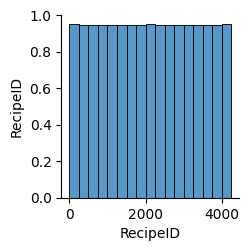

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

In [ ]:
df.columns

Index(['RecipeID', 'name', 'image_url', 'description', 'cuisine', 'course',
       'diet', 'prep_time', 'ingredients', 'instructions'],
      dtype='object')

In [ ]:
df['diet'].value_counts()

Vegetarian                      2858
High Protein Vegetarian          514
Non Vegeterian                   240
Diabetic Friendly                236
High Protein Non Vegetarian      139
Eggetarian                        95
No Onion No Garlic (Sattvic)      60
Gluten Free                       36
Vegan                             21
Name: diet, dtype: int64

In [ ]:
df['course'].value_counts()

Lunch                     1638
Side Dish                  855
Dinner                     442
Dessert                    389
South Indian Breakfast     275
Main Course                203
North Indian Breakfast     119
Appetizer                   91
Snack                       82
Indian Breakfast            77
One Pot Dish                19
World Breakfast              7
Brunch                       1
Name: course, dtype: int64

In [ ]:
df['ingredients'].value_counts()

            1/2 cup Semiya (Vermicelli)          , roasted                     1 cup Curd (Dahi / Yogurt)  For tempering            1 teaspoon Mustard seeds (Rai/ Kadugu)             1/2 teaspoon White Urad Dal (Split)             pinch Asafoetida (hing)             1 sprig Curry leaves             2 teaspoon Oil   Raw Peanuts (Moongphali)             1 sprig Curry leaves             2 teaspoon Oil             5 to 6 Cashew nuts          , for garnishing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
df.head(1)

,RecipeID,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions
0,1,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,Total in 35 M,1/2 cup Semiya (Vermicelli) ...,"To begin making the Thayir Semiya recipe, firs..."


In [ ]:
# name
# course
# diet (veg,nonveg,vegan)
# ingredients

recipes = df[['RecipeID','name','description','course', 'diet','ingredients']]

In [ ]:
recipes.head()

,RecipeID,name,description,course,diet,ingredients
0,1,Thayir Semiya Recipe (Curd Semiya),Thayir Semiya or Curd Vermicelli is a quick di...,Lunch,Vegetarian,1/2 cup Semiya (Vermicelli) ...
1,2,Chettinad Style Kara Kuzhambu Recipe with Pota...,Chettinad Style Kara Kuzhambu Recipe with Pot...,Lunch,Vegetarian,For ground masala 1/4 teaspoon Met...
2,3,Goan Chana Ros Recipe (White Peas Curry),Goan Chana Ros is a vegetarian dish from Goan ...,Lunch,Vegetarian,1/2 cup Dried Green Peas (Vatana) ...
3,4,Minced Meat And Egg Croquettes Recipe,The croquette is usually cigar shaped or cylin...,Appetizer,Non Vegeterian,"500 grams Mutton , minced..."
4,5,Thekera Tenga Recipe,Thekera Tenga is a Sour curry from Assamese cu...,Dinner,Vegetarian,"4 Potatoes (Aloo) , thinl..."


In [ ]:
recipes['ingredients'] = recipes['ingredients'].apply(lambda x:x.split())
recipes['description'] = recipes['description'].apply(lambda x:x.split())
recipes['name'] = recipes['name'].apply(lambda x:x.split())
recipes['course'] = recipes['course'].astype(str)
recipes['course'] = recipes['course'].apply(lambda x:x.split())
recipes['diet'] = recipes['diet'].astype(str)
recipes['diet'] = recipes['diet'].apply(lambda x:x.split())

<ipython-input-97-b25645c28871>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['ingredients'] = recipes['ingredients'].apply(lambda x:x.split())
<ipython-input-97-b25645c28871>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipes['description'] = recipes['description'].apply(lambda x:x.split())
<ipython-input-97-b25645c28871>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
recipes.head()

,RecipeID,name,description,course,diet,ingredients
0,1,"[Thayir, Semiya, Recipe, (Curd, Semiya)]","[Thayir, Semiya, or, Curd, Vermicelli, is, a, ...",[Lunch],[Vegetarian],"[1/2, cup, Semiya, (Vermicelli), ,, roasted, 1..."
1,2,"[Chettinad, Style, Kara, Kuzhambu, Recipe, wit...","[Chettinad, Style, Kara, Kuzhambu, Recipe, wit...",[Lunch],[Vegetarian],"[For, ground, masala, 1/4, teaspoon, Methi, Se..."
2,3,"[Goan, Chana, Ros, Recipe, (White, Peas, Curry)]","[Goan, Chana, Ros, is, a, vegetarian, dish, fr...",[Lunch],[Vegetarian],"[1/2, cup, Dried, Green, Peas, (Vatana), ,, so..."
3,4,"[Minced, Meat, And, Egg, Croquettes, Recipe]","[The, croquette, is, usually, cigar, shaped, o...",[Appetizer],"[Non, Vegeterian]","[500, grams, Mutton, ,, minced, 4, Whole, Eggs..."
4,5,"[Thekera, Tenga, Recipe]","[Thekera, Tenga, is, a, Sour, curry, from, Ass...",[Dinner],[Vegetarian],"[4, Potatoes, (Aloo), ,, thinly, sliced, 1, ta..."


In [ ]:
recipes['ingredients'].value_counts().head()

[1/2, cup, Semiya, (Vermicelli), ,, roasted, 1, cup, Curd, (Dahi, /, Yogurt), For, tempering, 1, teaspoon, Mustard, seeds, (Rai/, Kadugu), 1/2, teaspoon, White, Urad, Dal, (Split), pinch, Asafoetida, (hing), 1, sprig, Curry, leaves, 2, teaspoon, Oil, Raw, Peanuts, (Moongphali), 1, sprig, Curry, leaves, 2, teaspoon, Oil, 5, to, 6, Cashew, nuts, ,, for, garnishing]                                                                                                                                                                                                                                                                  2
[2, आलू, ,, काट, ले, 1, कप, गोभी, ,, काट, ले, 1, कप, मेथी, ,, धो, कर, काट, ले, तेल, ,, प्रयोग, अनुसार, 1, छोटा, चमच्च, जीरा, हींग, ,, चुटकी, भर, 1, छोटा, चमच्च, अदरक, ,, पेस्ट, 1/2, छोटा, चमच्च, हरी, मिर्च, ,, पेस्ट, 2, छोटा, चमच्च, चाट, मसाला, पाउडर, नमक, ,, स्वाद, अनुसार]                                                                                                     

In [ ]:
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter
from tqdm.auto import tqdm
import warnings
import sklearn

# Read the dataset
dataset = pd.read_csv("/content/updated_dataset.csv")

# Convert the ingredients and translated ingredients columns to lists
dataset['ingredients'] = dataset['ingredients'].str.split(',').str.strip().tolist()
dataset['TranslatedIngredients'] = dataset['TranslatedIngredients'].str.split(',').str.strip().tolist()

# Define a function to convert ingredient lists to sets for easier comparison
def ingredient_lists_to_sets(ingredients, translated_ingredients):
    return set(ingredients), set(translated_ingredients)

# Convert the dataset's ingredients and translated ingredients to sets
dataset['Ingredients_set'], dataset['TranslatedIngredients_set'] = ingredient_lists_to_sets(dataset['Ingredients'], dataset['TranslatedIngredients'])

# Create a function to calculate the similarity between two recipes using Jaccard similarity
def jaccard_similarity(ingredients_set, translated_ingredients_set):
    intersection = ingredients_set.intersection(translated_ingredients_set)
    union = ingredients_set.union(translated_ingredients_set)
    return len(intersection) / len(union)

# Create a function to recommend recipes based on user-provided ingredients
def recommend_recipes(user_ingredients, dataset):
    # Calculate the Jaccard similarity between the user's ingredients and each recipe in the dataset
    jaccard_similarities = [(jaccard_similarity(user_ingredients_set, recipe_ingredients_set), i) for i, (recipe_ingredients_set,) in enumerate(dataset.iterrows())]

    # Sort the list of recipes in descending order based on Jaccard similarity
    sorted_jaccard_similarities = sorted(jaccard_similarities, key=lambda x: x[0], reverse=True)

    # Recommend the top-N recipes based on Jaccard similarity
    top_n_recipes = [dataset.iloc[i][1:4] for i, (_, recipe_name) in sorted_jaccard_similarities[:N]]

    return top_n_recipes

# Example usage
user_ingredients = ['chicken', 'rice', 'carrots', 'tomatoes']
recommended_recipes = recommend_recipes(user_ingredients, dataset)

# Print the list of recommended recipes
print("Recommended Recipes:")
for recipe in recommended_recipes:
    print(recipe)


KeyError: 'TranslatedIngredients'

In [ ]:
df.columns

Index(['RecipeID', 'name', 'image_url', 'description', 'cuisine', 'course',
       'diet', 'prep_time', 'ingredients', 'instructions', 'ingredients_str'],
      dtype='object')

In [ ]:
df

,RecipeID,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,ingredients_str
0,1,Thayir Semiya Recipe (Curd Semiya),https://www.archanaskitchen.com/images/archana...,Thayir Semiya or Curd Vermicelli is a quick di...,Indian,Lunch,Vegetarian,Total in 35 M,[ 1/2 cup Semiya (Vermicelli) ...,"To begin making the Thayir Semiya recipe, firs...",1/2 cup Semiya (Vermicelli) ...
1,2,Chettinad Style Kara Kuzhambu Recipe with Pota...,https://www.archanaskitchen.com/images/archana...,Chettinad Style Kara Kuzhambu Recipe with Pot...,South Indian Recipes,Lunch,Vegetarian,Total in 75 M,[ For ground masala 1/4 teaspoon Me...,To begin making the Chettinad Style Kara Kuzha...,For ground masala 1/4 teaspoon Met...
2,3,Goan Chana Ros Recipe (White Peas Curry),https://www.archanaskitchen.com/images/archana...,Goan Chana Ros is a vegetarian dish from Goan ...,Goan Recipes,Lunch,Vegetarian,Total in 530 M,[ 1/2 cup Dried Green Peas (Vatana)...,"To prepare Goan Chana Ros recipe, soak the whi...",1/2 cup Dried Green Peas (Vatana) ...
3,4,Minced Meat And Egg Croquettes Recipe,https://www.archanaskitchen.com/images/archana...,The croquette is usually cigar shaped or cylin...,North Indian Recipes,Appetizer,Non Vegeterian,Total in 55 M,"[ 500 grams Mutton , minc...",To begin making the Minced Meat And Egg Croque...,500 grams Mutton minced...
4,5,Thekera Tenga Recipe,https://www.archanaskitchen.com/images/archana...,Thekera Tenga is a Sour curry from Assamese cu...,Assamese,Dinner,Vegetarian,Total in 30 M,"[ 4 Potatoes (Aloo) , thi...","To begin making the Thekera Tenga recipe, Heat...",4 Potatoes (Aloo) thinl...
...,...,...,...,...,...,...,...,...,...,...,...
4231,4232,Stir Fry Green beans and Tofu with Panch Phoro...,https://www.archanaskitchen.com/images/archana...,Stir Fry Green beans and Tofu with Panch Phoro...,Bengali Recipes,Side Dish,Vegetarian,Total in 40 M,[ 1 cup Green beans (French Beans) ...,We begin making the Stir Fry Green beans and T...,1 cup Green beans (French Beans) ...
4232,4233,Dhuska Recipe (Rice Fried Bread),https://www.archanaskitchen.com/images/archana...,Dhuska is a traditional recipe from Jharkhand....,Jharkhand,Snack,Vegetarian,Total in 50 M,"[ 1 cup Basmati rice , wa...","To begin making the Dhuska, grind rice and cha...",1 cup Basmati rice wash...
4233,4234,Khatta Meetha Petha Recipe (Yellow Pumpkin Sabzi),https://www.archanaskitchen.com/images/archana...,Khatta Meetha Petha or sweet and sour yellow p...,Indian,Lunch,Vegetarian,Total in 40 M,[ 1 Kaddu (Parangikai/ Pumpkin) ...,"To begin making the Yellow Pumpkin Sabzi, firs...",1 Kaddu (Parangikai/ Pumpkin) ...
4234,4235,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,https://www.archanaskitchen.com/images/archana...,Patta Gobi Matar Nu Shaak Recipe (Cabbage & Pe...,North Indian Recipes,Lunch,Vegetarian,Total in 25 M,[ 3 cups Cabbage (Patta Gobi/ Mutta...,"To begin making the Patta Gobi Matar Nu Shaak,...",3 cups Cabbage (Patta Gobi/ Muttai...


# accurate code

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
import io
from IPython.display import Image, display

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    #recommended_recipes = df.iloc[recipe_indices[:5]]
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken','butter']
recommendations = get_recommendations(user_input)


# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    #print(f"Image URL: {row['image_url']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-" )


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

In [ ]:
model.save('saved_model/my_model')

AttributeError: 'Module' object has no attribute 'save'

# draft



In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:5]]

    return recommended_recipes

# Function to calculate precision and recall
def calculate_precision_recall(actual_items, recommended_items):
    intersection = set(actual_items) & set(recommended_items)
    precision = len(intersection) / len(recommended_items) if len(recommended_items) > 0 else 0
    recall = len(intersection) / len(actual_items) if len(actual_items) > 0 else 0
    return precision, recall

# Example usage
user_input = ['chicken', 'onion']
recommendations = get_recommendations(user_input)

# Ground truth (simulated labeled data)
actual_items = ['Chicken Curry', 'Onion Soup', 'Tomato Rice']

# Extract recommended items
recommended_items = [row['name'] for _, row in recommendations.iterrows()]

# Calculate precision and recall
precision, recall = calculate_precision_recall(actual_items, recommended_items)

# Print results
print(f"User Input: {user_input}")
print(f"Recommended Items: {recommended_items}")
print(f"Actual Relevant Items: {actual_items}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


User Input: ['chicken', 'onion']
Recommended Items: ['Chettinad Chicken Recipe | Pepper Chicken Dry | South Indian ', 'Kerala Style Chicken Chatti Pathiri Recipe', 'Kongunad Chicken Fry Recipe', 'Goan Style Chicken Galinha Cafreal Recipe', 'Chicken In Tomato Onion Gravy Recipe']
Actual Relevant Items: ['Chicken Curry', 'Onion Soup', 'Tomato Rice']
Precision: 0.0
Recall: 0.0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:5]]

    return recommended_recipes

# Example usage
user_input = ['chicken', 'onion']
recommendations = get_recommendations(user_input)

# Ground truth (simulated labeled data)
actual_items = ['Chettinad Chicken Recipe | Pepper Chicken Dry | South Indian', 'Kerala Style Chicken Chatti Pathiri Recipe', 'Kongunad Chicken Fry Recipe', 'Goan Style Chicken Galinha Cafreal Recipe', 'Chicken In Tomato Onion Gravy Recipe']

# Extract recommended items
recommended_items = [row['name'] for _, row in recommendations.iterrows()]

# Calculate precision, recall, and F1 score
precision = precision_score(actual_items, recommended_items, average='micro')
recall = recall_score(actual_items, recommended_items, average='micro')
f1 = f1_score(actual_items, recommended_items, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.8
Recall: 0.8
F1 Score: 0.8000000000000002


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
import io
from IPython.display import Image, display
import tensorflow as tf

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    #recommended_recipes = df.iloc[recipe_indices[:5]]
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken','butter']
recommendations = get_recommendations(user_input)


# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    #print(f"Image URL: {row['image_url']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-" )




# Save the model in the SavedModel format
tf.saved_model.save(get_recommendations, 'recipe_recommendation_model')

# Convert the SavedModel to the tflite format
converter = tf.lite.TFLiteConverter.from_saved_model('recipe_recommendation_model')
tflite_model = converter.convert()


# Save the tflite model to a file
with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

ValueError: Expected an object of type `Trackable`, such as `tf.Module` or a subclass of the `Trackable` class, for export. Got <function get_recommendations at 0x7f25c4feb910> with type <class 'function'>.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf

class RecipeRecommendationModel(tf.Module):
    def __init__(self, df):
        self.df = df
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(df['ingredients_str'])
        self.cosine_sim = linear_kernel(self.tfidf_matrix, self.tfidf_matrix)

    def get_recommendations(self, user_input):
        user_vector = self.tfidf_vectorizer.transform([' '.join(user_input)])
        cosine_similarities = linear_kernel(user_vector, self.tfidf_matrix).flatten()
        recipe_indices = cosine_similarities.argsort()[::-1]
        recommended_recipes = self.df.iloc[recipe_indices[:5]]
        return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken', 'butter']
model = RecipeRecommendationModel(df)
recommendations = model.get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    print(f"Image URL: {row['image_url']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")

# Save the model in the SavedModel format
#tf.saved_model.save(model, 'recipe_recommendation_model')

# Convert the SavedModel to the tflite format
tf.saved_model.save(model, 'recipe_recommendation_model', signatures={'serving_default': model.get_recommendations})

signature_keys = ['get_recommendations']
converter = tf.lite.TFLiteConverter.from_saved_model('recipe_recommendation_model', signature_keys=signature_keys)

tflite_model = converter.convert()

# Save the tflite model to a file
with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 
Image URL: https://www.archanaskitchen.com/images/archanaskitchen/0-Archanas-Kitchen-Recipes/2018/Chicken_Cheese_Stuffed_Kulcha_Recipe-6_1600.jpg
Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated              

ValueError: Expected a TensorFlow function for which to generate a signature, but got <bound method RecipeRecommendationModel.get_recommendations of <__main__.RecipeRecommendationModel object at 0x7f25c5e6f4f0>>. Only `tf.functions` with an input signature or concrete functions can be used as a signature.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf
from IPython.display import Image, display
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:5]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken', 'butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")

# Save the model in the SavedModel format
class RecipeRecommendationModel(tf.Module):
    def __init__(self, df):
        self.df = df
        self.tfidf_vectorizer = TfidfVectorizer(stop_words='english')
        self.tfidf_matrix = self.tfidf_vectorizer.fit_transform(df['ingredients_str'])
        self.cosine_sim = linear_kernel(self.tfidf_matrix, self.tfidf_matrix)

    @tf.function(input_signature=[tf.TensorSpec(shape=[None], dtype=tf.string)])
    def get_recommendations(self, user_input):
        # Convert user_input from numpy array to Python list
        user_input = user_input.tolist()

        user_vector = self.tfidf_vectorizer.transform([' '.join(user_input)])
        cosine_similarities = linear_kernel(user_vector, self.tfidf_matrix).flatten()
        recipe_indices = cosine_similarities.argsort()[::-1]
        recommended_recipes = self.df.iloc[recipe_indices[:5]]
        return recommended_recipes

model = RecipeRecommendationModel(df)
tf.saved_model.save(model, 'recipe_recommendation_model2')


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

ValueError: in user code:

    File "<ipython-input-25-23fc3c97df22>", line 69, in get_recommendations  *
        user_input = user_input.tolist()

    ValueError: Symbolic Tensors do not support the tolist API.


In [ ]:
model.save('saved_model/my_model')

AttributeError: 'RecipeRecommendationModel' object has no attribute 'save'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
import io
from IPython.display import Image, display
import joblib

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Save the model to a file
joblib.dump(cosine_sim, 'cosine_sim.pb')

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    #recommended_recipes = df.iloc[recipe_indices[:5]]
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken','butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-" )


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

In [ ]:
# Load the model from the file
cosine_sim_loaded = joblib.load('cosine_sim.pb')


In [ ]:
# Define a function to get recommendations using the loaded model
def get_recommendations_loaded(user_input, cosine_sim=cosine_sim_loaded):
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()
    recipe_indices = cosine_similarities.argsort()[::-1]
    recommended_recipes = df.iloc[recipe_indices[:20]]
    return recommended_recipes

# Example usage
user_input = ['chicken', 'butter']
recommendations_loaded = get_recommendations_loaded(user_input)

# Print full details for recommended recipes
for index, row in recommendations_loaded.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

# 8 jan at 10:57pm

In [ ]:
# Packages for training the model and working with the dataset.
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import json

# Utility/helper packages.
import platform
import time
import pathlib
import os


In [ ]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.12
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [ ]:
df =  pd.read_csv("/content/updated_dataset.csv")

# New Section

In [ ]:
! pip install tensorflow

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['ingredients_str'])

train_sequences = tokenizer.texts_to_sequences(train_data['ingredients_str'])
test_sequences = tokenizer.texts_to_sequences(test_data['ingredients_str'])

# Pad sequences to have the same length
max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform on both training and testing labels
train_labels = label_encoder.fit_transform(train_data['cuisine'])
test_labels = label_encoder.transform(test_data['cuisine'])

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_padded, train_labels, epochs=5, validation_data=(test_padded, test_labels))

# Save the model in TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)


ValueError: y contains previously unseen labels: 'Arab'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
import io
from IPython.display import Image, display
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense
from tensorflow.keras.models import Model

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    #recommended_recipes = df.iloc[recipe_indices[:5]]
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken','butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    #print(f"Image URL: {row['image_url']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-" )

# Build a neural network model using TensorFlow and Keras
input_layer = Input(shape=(len(tfidf_vectorizer.vocabulary_),))
embedding_layer = Embedding(input_dim=len(tfidf_vectorizer.vocabulary_), output_dim=128, input_length=1)(input_layer)
flatten_layer = Flatten()(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
#model.fit(tfidf_matrix, cosine_sim, epochs=10, batch_size=32, validation_split=0.2)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:5]]

    return recommended_recipes

# Example usage
user_input = ['chicken', 'butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")

# Build a neural network model using TensorFlow and Keras
input_layer = Input(shape=(tfidf_matrix.shape[1],))
dense_layer = Dense(128, activation='relu')(input_layer)
output_layer = Dense(1, activation='linear')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model (you might need to adapt this based on your data)
dense_tfidf_matrix = tfidf_matrix.toarray()
model.fit(tfidf_matrix, cosine_sim.flatten(), epochs=10, batch_size=32, validation_split=0.2)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 
Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast  

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'scipy.sparse._csr.csr_matrix'>]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:15]]

    return recommended_recipes

# Example usage
user_input = ['paneer', 'butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")

# Convert sparse matrix to NumPy array
tfidf_matrix_np = np.array(tfidf_matrix.todense())

# Build a neural network model using TensorFlow and Keras
input_layer = Input(shape=(tfidf_matrix.shape[1],))
dense_layer = Dense(128, activation='relu')(input_layer)
output_layer = Dense(1, activation='linear')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(tfidf_matrix_np, cosine_sim.flatten(), epochs=10, batch_size=32, validation_split=0.2)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)


Recipe ID: 1493
Recipe Name: Paneer Masala Dosa Recipe-Paneer Bhurji Dosa
Description: The Paneer Bhurji Dosa Recipe is also known as the Paneer Masala Dosa. It is a delicious and wonderful take on the traditional classic Masala dosa that blends together the softness of cottage cheese with the crunchiness of capsicum.
Cuisine: South Indian Recipes
Course: South Indian Breakfast
Diet: High Protein Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For Paneer Masala/ Bhurji            2 cups Paneer (Homemade Cottage Cheese)          ,  crumbled                      1 Green Bell Pepper (Capsicum)          ,  finely chopped                     1 Onion          ,  finely chopped                     1 Green Chillies          ,  finely chopped                     1 Tomato          ,  finely chopped                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)             1 teaspoon Red Chilli powder             1 teaspoon Sambar Powder   Salt      

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import tensorflow as tf

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Load the saved TFLite model
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Helper function to get recommendations based on user input using TFLite model
def get_recommendations_tflite(user_input, interpreter):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])
    user_vector_np = np.array(user_vector.todense()).astype(np.float32)

    # Set input tensor
    input_tensor_index = interpreter.get_input_details()[0]['index']
    interpreter.set_tensor(input_tensor_index, user_vector_np)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output_tensor_index = interpreter.get_output_details()[0]['index']
    tflite_output = interpreter.get_tensor(output_tensor_index)

    # Get indices of recipes sorted by similarity
    recipe_indices = np.argsort(tflite_output.flatten())[::-1]

    # Get top 15 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:15]]

    return recommended_recipes

# Example usage with TFLite model
user_input = ['paneer', 'butter']
recommendations_tflite = get_recommendations_tflite(user_input, interpreter)

# Print full details for recommended recipes using TFLite model
for index, row in recommendations_tflite.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")


Recipe ID: 1
Recipe Name: Thayir Semiya Recipe (Curd Semiya)
Description: Thayir Semiya or Curd Vermicelli is a quick dish which you can make for lunch. If you are bored of eating curd rice everyday, you can always make this Thayir semiya or curd semiya for a change. In South India, people consume curd everyday. 
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1/2 cup Semiya (Vermicelli)          ,  roasted                     1 cup Curd (Dahi / Yogurt)  For tempering            1 teaspoon Mustard seeds (Rai/ Kadugu)             1/2 teaspoon White Urad Dal (Split)             pinch Asafoetida (hing)             1 sprig Curry leaves             2 teaspoon Oil   Raw Peanuts (Moongphali)             1 sprig Curry leaves             2 teaspoon Oil             5 to 6 Cashew nuts          ,  for garnishing          
Instructions: To begin making the Thayir Semiya recipe, firstly boil the vermicelli in 2 cups water. Drain it and spread o

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Scale the cosine similarity matrix to be in the range of [0, 1]
scaler = MinMaxScaler()
cosine_sim_scaled = scaler.fit_transform(cosine_sim)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:15]]

    return recommended_recipes

# Example usage
user_input = ['paneer', 'butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")

# Convert sparse matrix to NumPy array
tfidf_matrix_np = np.array(tfidf_matrix.todense())

# Build a neural network model using TensorFlow and Keras
input_layer = Input(shape=(tfidf_matrix.shape[1],))
dense_layer = Dense(128, activation='relu')(input_layer)
output_layer = Dense(1, activation='linear')(dense_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(tfidf_matrix_np, cosine_sim_scaled.flatten(), epochs=10, batch_size=32, validation_split=0.2)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('recipe_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

Recipe ID: 1493
Recipe Name: Paneer Masala Dosa Recipe-Paneer Bhurji Dosa
Description: The Paneer Bhurji Dosa Recipe is also known as the Paneer Masala Dosa. It is a delicious and wonderful take on the traditional classic Masala dosa that blends together the softness of cottage cheese with the crunchiness of capsicum.
Cuisine: South Indian Recipes
Course: South Indian Breakfast
Diet: High Protein Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For Paneer Masala/ Bhurji            2 cups Paneer (Homemade Cottage Cheese)          ,  crumbled                      1 Green Bell Pepper (Capsicum)          ,  finely chopped                     1 Onion          ,  finely chopped                     1 Green Chillies          ,  finely chopped                     1 Tomato          ,  finely chopped                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)             1 teaspoon Red Chilli powder             1 teaspoon Sambar Powder   Salt      

# new try


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow import lite

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
ingredient_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str']).toarray()

# Tokenize recipe names
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['name'])
vocab_size = len(tokenizer.word_index) + 1
sequences = tokenizer.texts_to_sequences(df['name'])
max_len = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Encode recipe IDs
recipe_encoder = LabelEncoder()
df['RecipeID'] = recipe_encoder.fit_transform(df['RecipeID'])

# Combine text and image features
ingredient_features = ingredient_matrix

# Split the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Neural Network Model
embedding_dim = 50

# Ingredient features
input_ingredient = Input(shape=(ingredient_matrix.shape[1],))
dense_ingredient = Dense(embedding_dim, activation='relu')(input_ingredient)
dropout_layer = Dropout(0.2)(dense_ingredient)

# Final recommendation layer
output = Dense(1, activation='sigmoid')(dropout_layer)

model = Model(inputs=input_ingredient, outputs=output)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
X_train_ingredient = ingredient_matrix[train.index]
y_train = train['RecipeID'].apply(lambda x: 1 if x in df['RecipeID'] else 0)

model.fit(X_train_ingredient, y_train, epochs=20, batch_size=64, validation_split=0.2)

# Save the model to a .tflite file
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('ingredient_recommendation_model.tflite', 'wb') as f:
    f.write(tflite_model)

# Load and deploy the model (Example)
interpreter = lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Example input with multiple ingredients
example_ingredients = ['paneer', 'butter']

# Convert input ingredients to TF-IDF matrix
example_ingredient_input = tfidf_vectorizer.transform([' '.join(example_ingredients)]).toarray().astype(np.float32)  # Convert to FLOAT32

# Set input tensors
input_ingredient_index = interpreter.get_input_details()[0]['index']
interpreter.set_tensor(input_ingredient_index, example_ingredient_input)

# Invoke the interpreter
interpreter.invoke()

# Get the output tensor
output_tensor_index = interpreter.get_output_details()[0]['index']
output = interpreter.get_tensor(output_tensor_index)

# Recommend recipes based on the output
threshold = 0.7  # You can adjust the threshold based on your needs

# Get the indices of the recommended recipes
recommended_indices = np.where(output > threshold)[0]

# Filter the train dataframe using the recommended indices
recommended_recipes = train.iloc[recommended_indices]

print(recommended_recipes[['RecipeID', 'name', 'ingredients_str']])


Epoch 1/20
43/43 [==============================] - 3s 24ms/step - loss: 0.4565 - accuracy: 0.9856 - val_loss: 0.2337 - val_accuracy: 1.0000
Epoch 2/20
43/43 [==============================] - 1s 16ms/step - loss: 0.1412 - accuracy: 1.0000 - val_loss: 0.0743 - val_accuracy: 1.0000
Epoch 3/20
43/43 [==============================] - 1s 22ms/step - loss: 0.0528 - accuracy: 1.0000 - val_loss: 0.0337 - val_accuracy: 1.0000
Epoch 4/20
43/43 [==============================] - 1s 21ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0191 - val_accuracy: 1.0000
Epoch 5/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 6/20
43/43 [==============================] - 1s 19ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 7/20
43/43 [==============================] - 1s 20ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 8/20
43

      RecipeID                                               name  \
3252      3252  सरसो वाली एग करीरेसिपी - Mustard Egg Curry Rec...   

                                        ingredients_str  
3252              4 अंडे            उबालकर बिच में स...  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.models import save_model


In [ ]:
import numpy as np
import tensorflow as tf

# Load the TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path="recipe_recommendation_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to make a recipe recommendation
def get_recipe_recommendation(ingredients):
    # Preprocess input data
    input_data = np.zeros((1, len(mlb.classes_)), dtype=np.float32)
    input_data[0, mlb.transform([ingredients])[0]] = 1.0

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Run the inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Post-process output to get recommended ingredients
    recommended_indices = np.argsort(output_data[0])[::-1][:5]  # Get top 5 recommended indices
    recommended_ingredients = mlb.classes_[recommended_indices]

    return recommended_ingredients

# Example usage
input_ingredients = ['tomato', 'onion', 'garlic']
recommendations = get_recipe_recommendation(input_ingredients)

# Convert the recommendations array to a pandas DataFrame
recommendations_df = pd.DataFrame(recommendations)

'''
for index, row in recommendations_df.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    # Displaying the image might require additional setup, as this depends on the environment.
    # Uncomment the next line if you have the 'Image' class defined and 'display' function available.
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")'''


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['garlic', 'onion', 'tomato'] will be ignored
  warnings.warn(


'\nfor index, row in recommendations_df.iterrows():\n    print(f"Recipe ID: {row[\'RecipeID\']}")\n    print(f"Recipe Name: {row[\'name\']}")\n    # Displaying the image might require additional setup, as this depends on the environment.\n    # Uncomment the next line if you have the \'Image\' class defined and \'display\' function available.\n    display(Image(url=row[\'image_url\'], width=300, height=200))\n    print(f"Description: {row[\'description\']}")\n    print(f"Cuisine: {row[\'cuisine\']}")\n    print(f"Course: {row[\'course\']}")\n    print(f"Diet: {row[\'diet\']}")\n    print(f"Preparation Time: {row[\'prep_time\']}")\n    print(f"Ingredients: {\', \'.join(row[\'ingredients\'])}")\n    print(f"Instructions: {row[\'instructions\']}")\n    print("\n-")'

In [ ]:
################################################## HA CHALAT HOTA  ###########################################




import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
import io
from IPython.display import Image, display
from tensorflow.keras.models import save_model, load_model
import tensorflow as tf
import numpy as np

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken','butter']
recommendations = get_recommendations(user_input)

# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    # Displaying the image might require additional setup, as this depends on the environment.
    # Uncomment the next line if you have the 'Image' class defined and 'display' function available.
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")

# Save the model as an HDF5 file
model.save("recipe_recommendation_model.h5")


# Load the saved model
loaded_model = load_model("recipe_recommendation_model.h5")


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

NameError: name 'model' is not defined

In [ ]:
# Load the saved model and TfidfVectorizer
loaded_model = load_model("recipe_recommendation_model.h5")
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_vectorizer_loaded = pickle.load(f)

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("recipe_recommendation_model.tflite", "wb") as f:
    f.write(tflite_model)

# Function to make a recipe recommendation using the TFLite model
def get_recommendations_tflite(user_input, tflite_model, tfidf_vectorizer):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Convert user vector to numpy array
    user_array = user_vector.toarray().astype(np.float32)

    # Load the TFLite model
    interpreter = tf.lite.Interpreter(model_content=tflite_model)
    interpreter.allocate_tensors()

    # Get input and output details
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    # Set input tensor
    interpreter.set_tensor(input_details[0]['index'], user_array)

    # Run the inference
    interpreter.invoke()

    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Get indices of recipes sorted by similarity
    recipe_indices = np.argsort(output_data.flatten())[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage with TFLite model
tflite_recommendations = get_recommendations_tflite(user_input, tflite_model, tfidf_vectorizer_loaded)

# Print full details for recommended recipes using TFLite model
print("Recommendations using TFLite model:")
for index, row in tflite_recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    # Displaying the image might require additional setup, as this depends on the environment.
    # Uncomment the next line if you have the 'Image' class defined and 'display' function available.
    # display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")


ValueError: Cannot set tensor: Dimension mismatch. Got 2221 but expected 15336 for dimension 1 of input 0.

In [ ]:
!pip install joblib

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import precision_score, recall_score, f1_score
import io
from IPython.display import Image, display

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TfidfVectorizer to convert text data into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input
def get_recommendations(user_input, cosine_sim=cosine_sim):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    #recommended_recipes = df.iloc[recipe_indices[:5]]
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Example usage
# user_input = ['rice', 'tomato', 'onion', 'cumin']
user_input = ['chicken','butter']
recommendations = get_recommendations(user_input)


# Print full details for recommended recipes
for index, row in recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    #print(f"Image URL: {row['image_url']}")
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-" )


Recipe ID: 1703
Recipe Name: Chicken Cheese Stuffed Kulcha Recipe 


Description: Chicken Cheese Stuffed Kulcha Recipe is a delicious kulcha recipe that is a must try. Chicken keema is cooked along with dry spice powders and then combined with cheese and stuffed in a kulcha dough. 
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Cheese filling            250 grams Chicken          ,  minced                     1 tablespoon Oil             2 cloves Garlic          ,  finely chopped                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Black pepper powder             1/3 teaspoon Turmeric powder (Haldi)             1 teaspoon Garam masala powder             1/2 cup Cheese          ,  grated                     1 teaspoon Coriander Powder (Dhania)  For the kulcha dough            1/2 cup Whole Wheat Flour             1/2 teaspoon Active dry yeast             1/2 cup All Purpose Flour (Maida)             1 tablespo

Description: Butter Chicken or Chicken Makhani is a creamy and delicious preparation of chicken in rich tomato gravy. Butter Chicken With Tandoori Mayo Recipe is a variant of the Mughlai Chicken Makhani.
Cuisine: North Indian Recipes
Course: Lunch
Diet: nan
Preparation Time: Total in 180 M
Ingredients:             400 grams Boneless chicken          ,  cubed to bite size (2-inches)           Butter (Salted)          ,  as required           Oil          ,  as required          For Chicken Marination:            2 tablespoon Del Monte Tandoori Mayo             1 tablespoon Cumin powder (Jeera)             1 tablespoon Coriander Powder (Dhania)             1 tablespoon Red Chilli powder             1/2 tablespoon Turmeric powder (Haldi)             3/4 tablespoon Ginger          ,  grated                     3/4 tablespoon Garlic          ,  grated                     1 tablespoon Lemon juice             2 tablespoon Curd (Dahi / Yogurt)             1 teaspoon Salt  For Butter Chicken Gr

Description: When the heart wants Indian but the tastebuds want a bit more what do you do? You make peanut butter chicken, douse it with Chinese chilli oil, serve it on a bed of lemon rice and you are set.
Cuisine: Asian
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Chicken breasts          ,  boneless                     1 Onion             1 Tomato             3/4 cup Chicken stock             3/4 cup Peanut Butter          ,  smooth                     1 tablespoon Chilli oil          ,  (can be substituted with 1/8 teaspoon smoked paprika)                     1/2 teaspoon Salt             1/2 teaspoon Black pepper powder             2 tablespoon Oil  
Instructions: To begin making the Peanut Butter Chicken recipe, heat oil in a large skillet, add onion and stir until translucent.Once the onions are soft and translucent, add the chicken pieces; cook until chicken starts to turn white.Add chilli oil, followed by sa

Description: Garlic Red Chicken gravy is the easiest chicken recipe to prepare, which can be done within few minutes. Though it requires only two main ingredients to prepare, it tastes so tasty and yummy. Just try it out.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 20 M
Ingredients:             1 kg Chicken          ,  cleaned                     2 tablespoons Oil             1 tablespoon Butter (Salted)             1 Onion          ,  sliced                     15 Dry Red Chillies             10 cloves Garlic             1 cup Curd (Dahi / Yogurt)             1 tablespoon Turmeric powder (Haldi)   Salt          ,  as required                     1 tablespoon Cumin powder (Jeera)          ,  (optional)          
Instructions: To begin making the Garlic Red Chicken Gravy recipe, soak red chillies and garlic for 10 minutes in hot water.Take a mixie jar. Grind the soaked red chillies and garlic into a fine paste. Keep it aside.

Description: Butter Chicken Masala Recipe is a delicious,creamy delightful chicken dish which has simple flavours yet it tastes great.
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Non Vegetarian
Preparation Time: Total in 45 M
Ingredients:  To marinate            300 grams Boneless chicken          ,  cut into pieces                     1/2 cup Curd (Dahi / Yogurt)             2 teaspoon Ginger Garlic Paste             1/2 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Garam masala powder             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Salt  For the Butter Chicken Masala            1 tablespoon Butter (Salted)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Garam masala powder             1 cup Homemade tomato puree             1 teaspoon Honey             1/4 cup Fresh cream             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  to taste 

Description: Chettinad Dry Pepper Chicken Recipe is very easy to make and tastes delicious.
Cuisine: Chettinad
Course: Appetizer
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  To Marinate Chicken            500 grams Chicken          ,  (chicken with bones gives better taste)                     10 cloves Garlic             2 inch Ginger             1/2 teaspoon Turmeric powder (Haldi)             1 Lemon          ,  juice extracted          For Chettinad Chicken            2 Onion          ,  finely chopped                     5 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Tomato          ,  finely chopped                     2 sprig Curry leaves          ,  roughly torn                     1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)          ,  roasted                     1 teaspoon Fennel Powder          ,  roasted                     1

Description: Chicken In White Gravy is a super simple chicken gravy that you can make for your week night dinners. Chicken cooked in a simple ginger- garlic, onion base, thinned down with some yogurt, that not only makes the gravy, but is the souring agent in this scrumptious chicken dish. 
Cuisine: Indian
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 25 M
Ingredients:             300 grams Boneless chicken             1 cup Curd (Dahi / Yogurt)             2 tablespoon Butter (Salted)             1 Onion          ,  thinly sliced                     3 teaspoon Ginger Garlic Paste             1-1/2 teaspoon White pepper powder             1 teaspoon Salt             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Powder (Dalchini)   Coriander (Dhania) Leaves          ,  for garnish           Tomato          ,  for garnish           Coriander (Dhania) Leaves          ,  for garnish          
Instructions: To begin making the Chicken In White Gravy rec

Description: Baby Corn Butter Masala Recipe is a classic all-time favorite dish of the North Indian Cuisine. In this recipe the baby corn, the crispy baby corn is simmered in creamy tomato based gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             500 grams Baby corn          ,  cut into slices                     3 Tomatoes          ,  pureed                     1 teaspoon Red Chilli powder             1 teaspoon Cumin powder (Jeera)             1 teaspoon Garam masala powder             1/4 cup Fresh cream             2 tablespoons Butter (Salted)   Salt          ,  to taste                     1 teaspoon Kasuri Methi (Dried Fenugreek Leaves)   Oil          ,  or butter will also do          Ingredients to be ground into a paste            1 Onion             1 inch Ginger          ,  peeled                     6 cloves Garlic             2 tablespoon Cashew nuts  
Instructions: To begin making the Baby Corn Butt

Description: Chicken Tikka Masala is a curry of roasted chicken pieces in a spicy sauce. The curry is known for its rich creamy texture. Chicken pieces are marinated in yogurt and spices and baked in an oven/pan fried. The fried pieces are then cooked in an aromatic  sauce and later, heavy cream is added to it to give a creamy texture.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 60 M
Ingredients:  To marinate chicken            300 grams Chicken          ,  cut into small size pieces                     1/2 cup Curd (Dahi / Yogurt)             1 teaspoon Cumin powder (Jeera)             1-1/2 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Turmeric powder (Haldi)             1 inch Ginger          ,  finely chopped                     6 cloves Garlic          ,  finely chopped                     1/2 teaspoon Red Chilli powder             1 tablespoon Kasuri Methi (Dried Fenugreek Leaves)   Salt          ,  as req

Description: Easy Vegan Date Roll Recipe is a sweet dessert recipe which is gluten free. There is no added sugar either. Make this easy to prepare dessert and impress your guests in your next tea party or dinner party. Serve Easy Vegan Date Roll Recipe along with other assorted desserts after dinner.
Cuisine: Indian
Course: Dessert
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             250 grams Dates          ,  seedless                     200 grams Mixed nuts          ,  chopped or ground,  (I used peanuts,  walnuts,  cashews,  almonds)           Almond butter          ,  or any vegan butter,  as needed          
Instructions: To prepare Easy Vegan Date Roll Recipe, clean the dates and ensure that they're deseeded. Then add dates into grinder and grind till smooth paste, in a mixer grinder. Add almond butter or ghee for proper mixing.Roast the mixed nuts well and grind them too.Place them into grinder and grind it. Now add vegan butter and make crumby texture like

Description: Murgh Palak Gravy Recipe is a classic North Indian gravy made with marinated chicken, pureed spinach and whole spices. The end result is a tasty and nutritious dish which is very easy to make and is also perfect for your weekday meals.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Non Vegeterian
Preparation Time: Total in 75 M
Ingredients:  Ingredients For Palak Puree            250 grams Spinach Leaves (Palak)          ,  cleaned           Salt          ,  a pinch                     4 cloves Garlic             2 Green Chillies  Ingredients For Chicken Marinade            500 grams Chicken          ,  curry cut                     2 tablespoons Curd (Dahi / Yogurt)             1 teaspoon Kashmiri Red Chilli Powder             1 teaspoon Garam masala powder             1 teaspoon Coriander (Dhania) Powder             1 tablespoon Salt  Ingredients For Murgh Masala            1 tablespoon Ghee          ,  chopped                     1 Bay leaf (tej patta)           

Description: Chicken In Tomato Onion Gravy Recipe is a delicious and mouth watering gravy that you can make on special occasions and feasts. Ground onions and green chillies add a nice flavour to the gravy and the pureed tomatoes and chicken masala give a bright red colour. This juicy chicken curry is delicious to taste and really quick to make, even for weeknight dinners.
Cuisine: Indian
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 30 M
Ingredients:             500 grams Chicken          ,  chopped to bite size           Oil          ,  to cook                     2 Onions          ,  roughly chopped                     2 Green Chillies             3 Tomatoes          ,  deseeded                     2 teaspoons Ginger Garlic Paste             1 tablespoon Curd (Dahi / Yogurt)             1/2 Lemon          ,  juiced                     1 tablespoon Chicken masala   Salt          ,  to taste           Coriander (Dhania) Leaves          ,  chopped,  to 

Description: Kerala Style Chicken Chatti Pathiri Recipe is a must try recipe at your kitchen. Pathiri is a type of Kerala pancakes that is layered with shredded chicken and then pan fried all together. This recipe is famous in North Malabar. It can be made savory and sweet as well. For sweet filling it is usually a mixture of grated coconut and sugar. The dish resembles a lasagna as it is layered with thin sheets of pancakes and chicken stuffing.
Cuisine: Kerala Recipes
Course: Snack
Diet: Non Vegeterian
Preparation Time: Total in 50 M
Ingredients:  For the Chicken Stuffing            300 grams Chicken          ,  minced                     1 Onion          ,  sliced                     1 sprig Curry leaves             4 cloves Garlic          ,  chopped                     1 inch Ginger          ,  chopped                     1 teaspoon Turmeric powder (Haldi)             2 teaspoons Red Chilli powder             2 teaspoons Garam masala powder             1 teaspoon Black pepper powd

Description: The Homemade Butter Naan recipe is simple to make in your own kitchen. Naan is an Indian bread which is on every restaurant menu. It is a rich Indian bread that goes well with most Indian gravies. Everyone loves the soft texture of a good Butter naan. It is a hit among everyone. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 90 M
Ingredients:             3 cups All Purpose Flour (Maida)             1/2 cup Butter (Unsalted)          ,  softened                     1 cup Curd (Dahi / Yogurt)             3 tablespoons Lukewarm Water             1 tablespoon Sugar             2 teaspoons Active dry yeast             1-1/2 teaspoons Salt  Others            2 teaspoons Chaat Masala Powder             1 tablespoon Butter (Salted)          ,  softened          
Instructions: To begin making the Butter Naan recipe, in a large bowl add the 3 cups of flour and butter. With your hands, blend the butter into the flour until it forms coarse cr

Description: Kongunad Chicken Fry is a finger licking good recipe of a chicken appetizer made South Indian style flavoured with whole spices and curry leaves. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: High Protein Non Vegetarian
Preparation Time: Total in 40 M
Ingredients:  For masala,  to roast and grind            2 inch Cinnamon Stick (Dalchini)             1 teaspoon Black pepper powder             3 tablespoon Coriander (Dhania) Seeds             1/2 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Poppy seeds             10 Red Chilli powder             5 tablespoon Dry coconut (kopra)  For chicken            1 cup Chicken breasts             2 tablespoon Oil             1 Onion             1/2 teaspoon Turmeric powder (Haldi)   Salt          ,  to taste           Curry leaves          ,  Handful                     1/2 cup Coriander (Dhania) Leaves          ,  chopped                     1 cup Water  
Instructions: To begin making the Kongunad Chicken Fry reci

Description: Murgh Masala is an easy chicken recipe which is spicy and succulent and is alos loved by everyone. In Murgh Masala, chicken legs are marinated in a yogurt marinade and cooked on the bone in a spicy tomato onion gravy.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 70 M
Ingredients:             400 grams Chicken legs             1 tablespoon Lemon juice          ,  to tenderize the chicken                     1 teaspoon Salt          ,  to tenderize the chicken                     1 teaspoon Ginger Garlic Paste             1 teaspoon Kashmiri Red Chilli Powder             2 tablespoons Curd (Dahi / Yogurt)          ,  beaten                     2 Onions          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 Cardamom (Elaichi) Pods/Seeds             1 inch Cinnamon Stick (Dalchini)             1 Bay leaf (tej patta)             3 tablespoons Homemade tomato puree             1

Description: Beetroot Loni Sponge Dosa Recipe, that I had tried at Kolhapur, and was amazed to see how a small street joint can come up with such an innovation. Loni Dosa is a soft, spongy and porous Dosa which is quite popular in Bangalore and Pune. Beetroot variation held me spell bound and made me recreate the recipe in my kitchen. I started testing the recipe with an idea to make it Healthy making skipping Loni/Butter. A generous amount of butter is added in the dosa that makes it very tasty. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             2 cups Idli Dosa Batter             2 cups Rice          ,  parboiled                     1/4 cup Poha (Flattened rice)          ,  (thick variety)                     3 cups Buttermilk          ,  sour                     1 teaspoon Cooking soda             1/4 cup Butter (Salted)          ,  loni (white butter)                     1 Beetroot          ,  peel

Description: Cheese Garlic Naan Recipe is a delicious naan recipe stuffed with gooey cheese and flavoured with garlic. The crispy flaky naan is cooked on a tawa and then on direct flame, to give it the lovely crispy texture. The garlic when comes in contact with the direct flame, gives the naan lovely roasted garlic flavour.  Slathered with butter and served hot with a dal or a delicious sabzi. 
Cuisine: North Indian Recipes
Course: Main Course
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1-1/2 cup All Purpose Flour (Maida)             1 cup Whole Wheat Flour             1/2 cup Curd (Dahi / Yogurt)             1 1/2 teaspoon Active dry yeast   Salt          ,  to taste                      1 tablespoon Garlic          ,  minced                      1/4 cup Coriander (Dhania) Leaves          ,  finely chopped                      1 tablespoon Butter (Salted)             1 teaspoon Oil  For the stuffing            1 cup Cheese          ,  grated           Fo

Description: Butter Garlic Naan is one of the most popular flatbreads which is served in most of the Indian restaurants. Traditionally baked in a hot Tandoor oven, this soft, smoky, leavened bread can be easily made at home using a hot iron griddle, on the stove top with almost similar result.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 270 M
Ingredients:             3 cups All Purpose Flour (Maida)             1-1/2 teaspoons Active dry yeast             1/4 cup Curd (Dahi / Yogurt)          ,  whisked           Salt          ,  as required                     1/2 teaspoon Sugar             8 cloves Garlic          ,  ground                     2 tablespoon Butter (Salted)          ,  softened           Lukewarm Water          ,  as required          For the topping            6 cloves Garlic          ,  finely minced                     2 teaspoons Coriander (Dhania) Leaves          ,  chopped                     1 teaspoon Mint Leaves (Pud

Description: This gravy is one of a perfect delight for your gorgeous evenings. Innovative and simple, this unique recipe will take you on an heavenly gastronomical trip. Make these for your guests at home or for Weekend house parties. You can also make this delicious recipe for your pot luck parties and treat your friends and family. 
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Lotus Stem  For Koftas            2 tablespoons Gram flour (besan)             1 teaspoon Red Chilli powder             1 teaspoon Coriander Powder (Dhania)             1/2 teaspoon Ginger Garlic Paste             1/2 teaspoon Coriander (Dhania) Leaves   Salt          ,  as per taste           Oil          ,  to fry          For gravy            2 Onions             1/2 inch Ginger             2 cloves Garlic             2 Cardamom (Elaichi) Pods/Seeds             4 cloves Cloves (Laung)             4 Whole Black Peppercorns            

In [ ]:
import joblib

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.joblib")


['tfidf_vectorizer.joblib']

In [ ]:
# Load the TF-IDF vectorizer
loaded_tfidf_vectorizer = joblib.load("tfidf_vectorizer.joblib")


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Create a unique identifier for each ingredient
ingredient_vocab = set(ingredient for ingredients_list in df['ingredients'] for ingredient in ingredients_list)
ingredient_to_index = {ingredient: idx + 1 for idx, ingredient in enumerate(ingredient_vocab)}
index_to_ingredient = {idx + 1: ingredient for idx, ingredient in enumerate(ingredient_vocab)}

# Map ingredients to their corresponding indices
df['ingredients_indices'] = df['ingredients'].apply(lambda x: [ingredient_to_index[ingredient] for ingredient in x])

# Create input sequences for the model
X = tf.keras.preprocessing.sequence.pad_sequences(df['ingredients_indices'], padding='post')

# Target variable (RecipeID)
y = df['RecipeID'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple neural network model
model = Sequential([
    Embedding(input_dim=len(ingredient_vocab) + 1, output_dim=50, input_length=X.shape[1]),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Assuming RecipeID is a regression task
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_dat a=(X_test, y_test))

# Save the model
model.save("recommendation_model.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("recommendation_model.tflite", "wb") as f:
    f.write(tflite_model)


Epoch 1/5
106/106 [==============================] - 18s 122ms/step - loss: 4523288.5000 - val_loss: 1638848.8750
Epoch 2/5
106/106 [==============================] - 3s 24ms/step - loss: 1485375.5000 - val_loss: 1537837.2500
Epoch 3/5
106/106 [==============================] - 2s 19ms/step - loss: 1362955.5000 - val_loss: 1474640.0000
Epoch 4/5
106/106 [==============================] - 2s 15ms/step - loss: 1122148.6250 - val_loss: 1411708.8750
Epoch 5/5
106/106 [==============================] - 1s 13ms/step - loss: 744096.6875 - val_loss: 1392454.7500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Input
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Preprocess the data
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Create a unique identifier for each ingredient
ingredient_vocab = set(ingredient for ingredients_list in df['ingredients'] for ingredient in ingredients_list)
ingredient_to_index = {ingredient: idx + 1 for idx, ingredient in enumerate(ingredient_vocab)}
index_to_ingredient = {idx + 1: ingredient for idx, ingredient in enumerate(ingredient_vocab)}

# Map ingredients to their corresponding indices
df['ingredients_indices'] = df['ingredients'].apply(lambda x: [ingredient_to_index[ingredient] for ingredient in x])

# Create input sequences for the model
X = tf.keras.preprocessing.sequence.pad_sequences(df['ingredients_indices'], padding='post')

# Target variable (RecipeID)
y = df['RecipeID'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a neural network model
model = Sequential([
    Embedding(input_dim=len(ingredient_vocab) + 1, output_dim=50, input_length=X.shape[1]),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(df['RecipeID'].unique()), activation='softmax')  # Assuming RecipeID is a classification task
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("recommendation_model2.h5")

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("recommendation_model2.tflite", "wb") as f:
    f.write(tflite_model)


Epoch 1/5
106/106 [==============================] - 8s 68ms/step - loss: 8.3679 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/5
106/106 [==============================] - 3s 24ms/step - loss: 8.3352 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/5
106/106 [==============================] - 2s 21ms/step - loss: 8.2939 - accuracy: 8.8548e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/5
106/106 [==============================] - 2s 20ms/step - loss: 7.8039 - accuracy: 0.0015 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/5
106/106 [==============================] - 3s 27ms/step - loss: 6.5479 - accuracy: 0.0100 - val_loss: nan - val_accuracy: 0.0000e+00


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
########################################################### YE VALA SAHI HAI ########################################################
#####################################################################################################################################

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from IPython.display import Image, display
import joblib

# Load the dataset
df = pd.read_csv('/content/updated_dataset.csv')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load("/content/tfidf_vectorizer.joblib")

# Preprocess the data for the TFLite model
df['ingredients'] = df['ingredients'].apply(lambda x: x.split(','))
df['ingredients_str'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Use TF-IDF vectorizer to convert text data into numerical vectors
tfidf_matrix = tfidf_vectorizer.transform(df['ingredients_str'])

# Calculate cosine similarity between recipes based on ingredients
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Helper function to get recommendations based on user input using TFLite model
def get_recommendations_tflite(user_input, tflite_model, tfidf_vectorizer):
    # Transform user input into a vector
    user_vector = tfidf_vectorizer.transform([' '.join(user_input)])

    # Calculate cosine similarity between user input and recipes
    cosine_similarities = linear_kernel(user_vector, tfidf_matrix).flatten()

    # Get indices of recipes sorted by similarity
    recipe_indices = cosine_similarities.argsort()[::-1]

    # Get top 5 recommendations with full details
    recommended_recipes = df.iloc[recipe_indices[:20]]

    return recommended_recipes

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Example usage with TFLite model
user_input = ['chicken', 'butter']  # Replace with user's input
user_vector = tfidf_vectorizer.transform([' '.join(user_input)])
user_vector_tflite = user_vector.toarray().astype('float32')  # Convert to float32 for TFLite

# Ensure the input tensor has the correct shape
input_shape = input_details[0]['shape']
user_vector_tflite_resized = user_vector_tflite.flatten()[:np.prod(input_shape)].reshape(input_shape).astype('float32')

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], user_vector_tflite_resized)

# Run inference
interpreter.invoke()

# Get output tensor
output_tensor = interpreter.get_tensor(output_details[0]['index'])

# Get the recommended recipe indices
recommended_recipe_indices = output_tensor.flatten().argsort()[::-1][:20]

# Get top 5 recommendations with full details
tflite_recommendations = df.iloc[recommended_recipe_indices]

# Print full details for recommended recipes using TFLite model
for index, row in tflite_recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")


Recipe ID: 817
Recipe Name: Spicy Rice Stuffed Paratha Recipe


Description: Spicy Rice Stuffed Paratha is a perfect recipe, if you have leftover rice in your fridge. We are usually left with rice after our meal and we end up throwing them. From now, don’t throw them instead use them in making stuffed parathas for your filing breakfast.
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1 cup Whole Wheat Flour             1/2 cup Cooked rice          ,  (leftover)                     1 Onion          ,  finely chopped           Coriander (Dhania) Leaves          ,  small bunch,  finely chopped                     2 Green Chillies             1/2 teaspoon Cumin powder (Jeera)             1 teaspoon Red Chilli powder             1 teaspoon Chaat Masala Powder             2 teaspoons Lemon juice   Salt          ,  to taste           Oil          ,  or ghee for cooking paratha           Water          ,  as required          
Instructions: To begin making the Spicy Rice Stuffed Paratha, we will first

Description: Dahi Wale Aloo Recipe is a common Punjabi dish also cooked in the rest of Northern India. A comforting Navratri dish it is made of boiled potato chunks cooked in a thick creamy yogurt curry which is cooling and perfect for fasting days. Once you have boiled potatoes ready, this dish comes together in no time at all and can be prepared when you have unexpected guests. Simple, quick and made with just a handful of ingredients its a good addition to any meal.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 55 M
Ingredients:             4 Potatoes (Aloo)          ,  chopped                     1-1/2 cups Curd (Dahi / Yogurt)             2 tablespoons Gram flour (besan)             1/3 teaspoon Asafoetida (hing)             1 teaspoon Cumin seeds (Jeera)             1 sprig Curry leaves             1 Onion          ,  finely chopped                     1/2 teaspoon Ginger          ,  finely chopped                     1/2 teaspoon Garlic 

Description: चिल्ली मिली एक उत्तर भारतीय डिश है। यह काजू और टमाटर की ग्रेवी की डिश है। इस ग्रेवी में बहुत सारी सब्ज़िया मसालो के साथ पकाई जाती है।  
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 60 M
Ingredients:             1 कप गोबी          ,  बारीक कटी हुई                     1 गाजर          ,  पतली कटी हुई                     1 हरी शिमलामिर्च          ,  पतली कटी हुई                     4 टमाटर             1/2 कप हरा मट्टर             3 बड़ा चमच्च काजू             2 बड़ा चमच्च तेल             1 तेज पत्ता             2 इलाइची          ,  हरी                     1 इलाइची          ,  काली                     2 लवंग             1 इंच दालचीनी             1 प्याज          ,  बारीक कटा हुआ                     1 बड़ा चमच्च अदरक लहसुन का पेस्ट              1/2 बड़ा चमच्च हल्दि             1 बड़ा चमच्च कश्मीरी लाल मिर्च पाउडर             1 बड़ा चमच्च धनिया पाउडर             3 to 4 हरी मीर्च          ,  चीरि हुई                     1-1/2 कप पानी           

Description: लहसुनि दाल तड़का एक सरल रोज की दाल है जिसमे लहसुन का तड़का दिया जाता है. इसमें कद्दू भी डाला जाता है जो इस डाक को और भी स्वादिष्ट बनाता है. यह बनाने में बहुत आसान है इसलिए आप इसे अपने रोज के खाने के लिए बना सकते है. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Vegetarian
Preparation Time: Total in 55 M
Ingredients:             1/4 कप अरहर दाल             1/4 कप हरी मूंग दाल             1/4 कप मसूर दाल             1 इंच अदरक          ,  कस ले                     2 हरी मिर्च          ,  पतला और सीधा काट ले                     1 इंच दाल चीनी             1 तेज पत्ता             2 टमाटर          ,  बारीक काट ले                     250 ग्राम कद्दू          ,  छीलकर काट ले           नमक          ,  स्वाद अनुसार                     1 छोटा चम्मच हल्दी पाउडर  तड़के के लिए            1 छोटा चम्मच घी             1 छोटा चम्मच जीरा             3 कली लहसुन             2 सुखी लाल मिर्च  
Instructions: लहसुनि दाल तड़का रेसिपी बनाने के लिए सबसे पहले प्रेशर कुकर में दाल, अदरक

Description: सुखी उरद दाल रेसिपी एक उत्तर भारतीय स्टाइल सब्ज़ी है जिसमे उरद दाल को रोज के मसालो के साथ पकाया जाता है. यह एक बहुत ही आसान रेसिपी है इसे आप अपने लंच बॉक्स में पराठे के साथ बी पैक कर सकते है. इस रेसिपी में दाल को उबाल कर उसे जीरा, हींग, प्याज, हरी मिर्च और अदरक के साथ पकाया जाता है.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Vegetarian
Preparation Time: Total in 40 M
Ingredients:             1 कप सफ़ेद उरद दाल             1/4 कप पानी             1 प्याज          ,  काट ले                     1 इंच अदरक          ,  बारीक काट ले                     1 हरी मिर्च          ,  बारीक काट ले                     1 छोटा चम्मच जीरा             1/4 छोटा चम्मच हींग             1/2 छोटा चम्मच हल्दी पाउडर             1/2 छोटा चम्मच धनिया पाउडर             1/2 छोटा चम्मच गरम मसाला पाउडर   नमक          ,  स्वाद अनुसार                     1 छोटा चम्मच घी             1 निम्बू          ,  रस निकाल ले           हरा धनिया          ,  थोड़ा,  गार्निश के लिए बारीक काट ले          

Description: बंगाली फूल गोभीर पतुरी एक बंगाली साइड डिश है जिसमे गोभी और आलू को खस खस और जीरे के साथ पकाया जाता है. यह सब्ज़ी बनाने में आसान है और बहुत काम समय में बन जाती है. खस खस डालने से इसका स्वाद और भी बढ़ जाता है.  
Cuisine: Bengali Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             1 कप आलू          ,  काट ले                     2 कप गोभी          ,  काट ले                     1 बड़ा चमच्च जीरा          ,  काला                     3 बड़े चमच्च खस खस             1/2 छोटा चमच्च हल्दी पाउडर             4 हरी मिर्च          ,  स्वाद अनुसार                     1 बड़ा चमच्च तेल             1/2 छोटा चमच्च नमक  
Instructions: बंगाली फूल गोभीर पतुरी बनाने के लिए सबसे पहले आलू और गोभी को धो कर काट ले. अब एक सॉसपैन में पानी डाले और उबलने दे. पानी के उबलने के बाद इसमें गोभी डाले और नरम होने तक पकने दे. पानी निकले और गोभी को अलग से रख दे. अब एक कढ़ाई में तेल गरम करें। इसमें जीरा डाले और 30 सेकण्ड्स तक पकने दे. अब इसमें गोभी, आलू, हल्दी पाउडर, नमक डाले औ

Description: Fish Molee is one traditional Kerala Cuisine based Fish Stew recipe. The addition of coconut milk and exotic spices gives a nice aromatic and light sense to it. Kerala Style Fish Molee goes perfectly with Steamed Rce to enjoy a weekday meal.
Cuisine: Kerala Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 35 M
Ingredients:             300 gram Fish             3 teaspoon Oil             1/2 teaspoon Cumin seeds (Jeera)             1 Onion          ,  chopped                     1 teaspoon Ginger          ,  paste                     2 Tomatoes          ,  chopped                     3 cloves Garlic          ,  finely chopped                     1/4 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Red Chilli powder             1/4 teaspoon Vinegar             1/4 Lemon juice             50 ml Coconut milk   Salt          ,  to taste          
Instructions: To begin making the Fish Molee Recipe, firstly wash the fish cutlet pieces a

Description: The Aam Ki Launji Pickle Recipe is a simple finger licking pickle made from fresh raw mangoes. The addition of methi seeds along with the hing, jaggery and other spices makes this dish stand out with perfection.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             500 grams Mango (Raw)          ,  peeled and chopped                     1/4 cup Jaggery             1/2 teaspoon Red Chilli powder   Salt          ,  to taste                     1 tablespoon Oil             1/2 teaspoon SSP Asafoetida (Hing)             1/4 teaspoon Methi Seeds (Fenugreek Seeds)             1 teaspoon Cumin seeds (Jeera)             1 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Turmeric powder (Haldi)   Black Salt (Kala Namak)          ,  to taste                     1/2 teaspoon Garam masala powder  
Instructions: To begin making Aam Ki Launji Pickle Recipe, wash and wipe the mango, cut into wedges and set aside. H

Description: Meat Masala Bharwa Baingan is my instant hack to a tasty finger licking and instant stuffed baingan masala when you have no time to make stuffing from scratch. If you are pretty much bored with usual baingan variety so I thought of this hack. 
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             250 grams Brinjal (Baingan / Eggplant)             5 tablespoons Meat masala   Salt          ,  to taste                      1 Onion          ,  chopped                     1 Tomato          ,  chopped                     1 teaspoon Ginger Garlic Paste          ,  (optional)                     3 tablespoons Mustard oil             1 teaspoon Cumin seeds (Jeera)             1/2 teaspoon Asafoetida (hing)  
Instructions: To begin making the Meat Masala Stuffed Bharwa Baingan recipe, hold the tip and make two opposite slits.Add salt to the meat masala and mix well. With a teaspoon stuff baingan with meat masala.Heat mustard oil till

Description: Tangy & Spicy Chunky Pineapple Chutney Recipe is a delicious chutney with minimal cooking and absolutely no grinding. 
Cuisine: Sri Lankan
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             2 cups Pineapple          ,  cubes                      1 teaspoon Oil             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Stick (Dalchini)             2 sprig Curry leaves             1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Red Chilli flakes             1 teaspoon Paprika powder             2 teaspoons Sugar             1/4 cup Water   Salt          ,  to taste          
Instructions: To begin making the Tangy & Spicy Chunky Pineapple Chutney Recipe, heat oil in a heavy bottomed pan on medium flame. To this pan, add the cardamom pods, cinnamon stick, curry leaves, and allow them to crackle. Once it crackles, add turmeric powder, red chilli flakes, paprika powder, sugar, water and salt to taste. Let it cook for 

Description: A delicious paratha recipe,  Stuffed Mooli Paneer Paratha, has a stuffing of radish and cottage cheese seasoned with salt and cumin powder. The addition of ginger-garlic-green chilli in the filling gives the paratha a lovely flavour. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             2 Mooli/ Mullangi (Radish)          ,  washed and grated                     200 grams Paneer (Homemade Cottage Cheese)          ,  grated                     1 Green Chilli          ,  finely chopped                      4 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 teaspoon Cumin powder (Jeera)             2 teaspoon Oil   Salt          ,  to taste                      1/4 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)             1 cup Whole Wheat Flour   Ghee          ,  to cook the parathas       

Description: The Moong Dal Palak Cheela Recipe is a great way to start your day - a healthy breakfast which should be high in proteins, essential vitamins and minerals to keep you going whole day. The Moong Dal Palak Cheela makes its way to any meal, be it breakfast, a quick brunch, a full meal lunch or even dinner. This Cheela is an exceptional way to introduce the vegetables along with lentils for your kids or toddlers meal. The spiciness can be adjusted accordingly when making for the younger ones.
Cuisine: Indian
Course: North Indian Breakfast
Diet: High Protein Vegetarian
Preparation Time: Total in 50 M
Ingredients:             250 grams Yellow Moong Dal (Split)             1/2 cup Curd (Dahi / Yogurt)          ,  whisked                     50 grams Spinach Leaves (Palak)          ,  finely chopped                     1 Onion          ,  finely chopped           Coriander (Dhania) Leaves          ,  a bunch,  finely chopped                     2 Green Chillies          ,  finely 

Description: Akhrot Burfi or Walnut Burfi with condensed milk is a simple sweet recipe which is usually made during special occasions. It is soft and slightly chewy with a nutty taste from walnuts. 
Cuisine: Indian
Course: Snack
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 cup Walnuts          ,  (akhrot)                     1-1/2 cup Condensed Milk             1/2 teaspoon Cardamom Powder (Elaichi)  
Instructions: To begin making Akhrot Burfi Recipe, in a pan add walnuts and slightly toast over a medium flame until the walnut skin starts getting off. Peel and discard the akhrot/walnuts skin and grind the walnuts to a coarse powder using a blender. Grease the plate with ghee or butter and keep it aside. Place a pan on medium heat. Add condensed milk and powdered akhrot/walnuts to it. Cook the mixture over medium heat until the condensed milk and walnuts mixture becomes thick.Keep stirring in between to avoid the condensed milk getting burned and sticking 

Description: Lal Bhoplyache Bharit is a Maharashtrian side dish made by mixing steamed red pumpkin, curd, crushed groundnuts and is then tempered with flavourful spices. The recipe is very quick and uses simple day-to-day ingredients. This appetising raita is a great side dish even if you are fasting and is sure to win over even those who do not like pumpkin.
Cuisine: Indian
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             250 grams Kaddu (Parangikai/ Pumpkin)          ,  peeled and chopped                     3/4 cup Hung Curd (Greek Yogurt)          ,  whisked (adjust)                     1 tablespoon Oil          ,  (or ghee)                     1 teaspoon Cumin seeds (Jeera)             2 to 3 Green Chillies          ,  chopped                     2 tablespoons Groundnut powder          ,  roasted                     1/4 teaspoon Asafoetida (hing)             1 teaspoon Sugar   Salt          ,  Salt to taste           Coriander (Dhania) Le

Description: Dahi Chivda Recipe is a Fruit, Yogurt and Flattened Rice Breakfast Parfait. This Dahi Chivda is a no-cook, gluten free, healthy breakfast parfait that is popular among everyone irrespective of ages.
Cuisine: Fusion
Course: World Breakfast
Diet: Vegetarian
Preparation Time: Total in 15 M
Ingredients:             1 cup Poha (Flattened rice)          ,  or  poha                     1 cup Curd (Dahi / Yogurt)          ,  (or as required)                     1 cup Mango (Ripe)          ,  diced                     1 cup Strawberries          ,  (hulled washed and chopped or sliced)                     2 tablespoon Mixed nuts   Honey          ,  or palm sugar to sweeten the yogurt          
Instructions: To prepare Dahi Chivda Recipe (Fruit, Yogurt & Flattened Rice Breakfast Parfait), rinse the chivda twice and then drain excess water using a big sieve or colander.Keep the chivda aside for approximately for 2 minutes or till the chivda is soft. Fluff the chivda using a fork.Tran

Description: The Hibiscus (Chembaruthi) Dosai Recipe is a healthy dosa made from Hibiscus leaves and ground along with rice to make into a dosa. Hibiscus is a commonly found flower in India that is used as an offering to the Gods. Hibiscus is also used for medicinal purposes and is an important constituent in many ayurvedic medicines. Hibiscus leaves are said to be rich in antioxidants, which help clean your body from harmful and unwanted toxins.
Cuisine: South Indian Recipes
Course: South Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 345 M
Ingredients:             1 cup Dosa rice             2 cups Water   Salt and Pepper          ,  to taste                     100 grams White hibiscus leaves          ,  cleaned and chopped           Oil          ,  for making dosa          
Instructions: To begin making the Hibiscus (Chembaruthi) Neer Dosa Recipe, first soak the rice over night or for at least 8 hours in water.Once soaked, using a mixer grinder blend the rice along wi

Description: टमाटर प्याज और ककड़ी का रायता एक सेहतमंद और स्वादिष्ट रायता है जिसे अक्सर बिरयानी के साथ परोसा जाता है. इसमें हरी मिर्च और जीरा पाउडर डाला जाता है जो इस रायते को और भी स्वादिष्ठ बनाता है. 
Cuisine: Indian
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             2 कप हंग दही          ,  फेट ले                     2 ककड़ी          ,  छीलकर काट ले                     2 टमाटर          ,  बारीक काट ले                     2 हरी मिर्च          ,  बारीक काट ले                     1 छोटा चमच्च जीरा पाउडर             1 छोटा चमच्च तेल             1/2 छोटा चमच्च राइ   नमक          ,  स्वाद अनुसार          
Instructions: टमाटर प्याज और ककड़ी का रायता बनाने के लिए सबसे पहले साड़ी सब्जिआ काट कर अलग से रख दे. अब एक बाउल में दही को फेट ले और उसमे नमक, जीरा पाउडर, कटी हुई सब्जिआ डाले और मिला ले. अब हम इस पर तड़का लगाएंगे। एक तड़का पेन ले और उसमे राइ डाले और 10 सेकण्ड्स के लिए पकने दे.अब यह तड़का रायते में डाले, मिलाए और परोसे। टमाटर प्याज और ककड़ी के रायते को दाल 

Description: Mooli Jowar Ki Roti is a healthy and wholesome breakfast roti that fills your stomach to keep you going for a long time. Kambu Roti/Chapathi as it is known in South India, is a diabetic friendly recipe as Jowar is a complex carbohydrate ingredient.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Mooli/ Mullangi (Radish)             1 1/2 cup Jowar Flour (Sorghum)             1 teaspoon Ginger Garlic Paste             1/2 teaspoon Red Chilli powder   Salt          ,  as required           Oil          ,  as required           Hot water          ,  for kneading          
Instructions: To begin making Mooli Jowar Ki Roti, wash the radish thoroughly, peel the skin and grate it. Take the grated radish in a mixing bowl, add jowar flour, ginger garlic paste, chilli powder and required amount of salt to it. Mix all ingredients well and add very little hot water. The water from the grated radish will be suffici

Description: Madras Lamb Curry Recipe is a luscious rich curry that you will fall in love with the blend of spices that is used to make the gravy. The spices used are typically used in south India region like the dried red chillies, poppy seeds, jeera, cumin seeds, cloves, cinnamon, mustard seeds and coriander seeds. The lamb curry is cooked in mustard oil which imparts a strong and pungent flavour to the Lamb chops. The curry has a light hint of tanginess from the use of tamarind paste which is well balanced with the spices used to create a comforting dish.
Cuisine: South Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 65 M
Ingredients:  For the Spice            2 tablespoon Coriander (Dhania) Seeds             2 tablespoon Poppy seeds             1/2 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Cumin seeds (Jeera)             1 teaspoon Fennel seeds (Saunf)             1 teaspoon Yellow Fenugreek Seeds             2 Cloves (Laung)          

Description: Bottle Gourd Peel Chutney is a delicious chutney which is made from bottle gourd, green chillies, tomatoes and dry spices. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             1 Cup Bottle gourd (lauki)          ,  chopped along with skin                     2 Tomatoes             2 Green Chillies   Salt          ,  to taste                     1 teaspoon Turmeric powder (Haldi)             2 tablespoon Oil             1 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Methi Seeds (Fenugreek Seeds)             1 teaspoon White Urad Dal (Split)             10 Dry Red Chillies             1/2 teaspoon Asafoetida (hing)             2 sprig Coriander (Dhania) Leaves             1 teaspoon Tamarind Paste  
Instructions: To begin making the Bottle Gourd Peel Chutney recipe, we need to fry the ingredients. Heat oil in a pan on medium heat, add mustard seeds, fenugreek seeds and urad dal. Once the  mu

In [ ]:
# Print shapes for debugging
print("Expected Input Shape:", input_details[0]['shape'])
print("Actual User Vector Shape:", user_vector_tflite.shape)


Expected Input Shape: [ 1 29]
Actual User Vector Shape: (1, 2221)


In [ ]:
print("Expected Input Shape:", input_shape)
print("Actual User Vector Shape:", user_vector_tflite.shape)
print("Resized User Vector Shape:", user_vector_tflite_resized.shape)


Expected Input Shape: [ 1 29]
Actual User Vector Shape: (1, 2221)


NameError: name 'user_vector_tflite_resized' is not defined

In [ ]:
############################################################ IT WORKS ##################################################################


# Example usage with TFLite model
user_input = ['chicken', 'butter']  # Replace with user's input
user_vector = tfidf_vectorizer.transform([' '.join(user_input)])
user_vector_tflite = user_vector.toarray().astype('float32')  # Convert to float32 for TFLite

# Ensure the input tensor has the correct shape
input_shape = input_details[0]['shape']
user_vector_tflite_resized = user_vector_tflite.flatten()[:np.prod(input_shape)].reshape(input_shape).astype('float32')

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], user_vector_tflite_resized)

# Run inference
interpreter.invoke()

# Get output tensor
output_tensor = interpreter.get_tensor(output_details[0]['index'])

# Get the recommended recipe indices
recommended_recipe_indices = output_tensor.flatten().argsort()[::-1][:20]

# Get top 5 recommendations with full details
tflite_recommendations = df.iloc[recommended_recipe_indices]

# Print full details for recommended recipes using TFLite model
for index, row in tflite_recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")


Recipe ID: 817
Recipe Name: Spicy Rice Stuffed Paratha Recipe


Description: Spicy Rice Stuffed Paratha is a perfect recipe, if you have leftover rice in your fridge. We are usually left with rice after our meal and we end up throwing them. From now, don’t throw them instead use them in making stuffed parathas for your filing breakfast.
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1 cup Whole Wheat Flour             1/2 cup Cooked rice          ,  (leftover)                     1 Onion          ,  finely chopped           Coriander (Dhania) Leaves          ,  small bunch,  finely chopped                     2 Green Chillies             1/2 teaspoon Cumin powder (Jeera)             1 teaspoon Red Chilli powder             1 teaspoon Chaat Masala Powder             2 teaspoons Lemon juice   Salt          ,  to taste           Oil          ,  or ghee for cooking paratha           Water          ,  as required          
Instructions: To begin making the Spicy Rice Stuffed Paratha, we will first

Description: Dahi Wale Aloo Recipe is a common Punjabi dish also cooked in the rest of Northern India. A comforting Navratri dish it is made of boiled potato chunks cooked in a thick creamy yogurt curry which is cooling and perfect for fasting days. Once you have boiled potatoes ready, this dish comes together in no time at all and can be prepared when you have unexpected guests. Simple, quick and made with just a handful of ingredients its a good addition to any meal.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 55 M
Ingredients:             4 Potatoes (Aloo)          ,  chopped                     1-1/2 cups Curd (Dahi / Yogurt)             2 tablespoons Gram flour (besan)             1/3 teaspoon Asafoetida (hing)             1 teaspoon Cumin seeds (Jeera)             1 sprig Curry leaves             1 Onion          ,  finely chopped                     1/2 teaspoon Ginger          ,  finely chopped                     1/2 teaspoon Garlic 

Description: चिल्ली मिली एक उत्तर भारतीय डिश है। यह काजू और टमाटर की ग्रेवी की डिश है। इस ग्रेवी में बहुत सारी सब्ज़िया मसालो के साथ पकाई जाती है।  
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 60 M
Ingredients:             1 कप गोबी          ,  बारीक कटी हुई                     1 गाजर          ,  पतली कटी हुई                     1 हरी शिमलामिर्च          ,  पतली कटी हुई                     4 टमाटर             1/2 कप हरा मट्टर             3 बड़ा चमच्च काजू             2 बड़ा चमच्च तेल             1 तेज पत्ता             2 इलाइची          ,  हरी                     1 इलाइची          ,  काली                     2 लवंग             1 इंच दालचीनी             1 प्याज          ,  बारीक कटा हुआ                     1 बड़ा चमच्च अदरक लहसुन का पेस्ट              1/2 बड़ा चमच्च हल्दि             1 बड़ा चमच्च कश्मीरी लाल मिर्च पाउडर             1 बड़ा चमच्च धनिया पाउडर             3 to 4 हरी मीर्च          ,  चीरि हुई                     1-1/2 कप पानी           

Description: लहसुनि दाल तड़का एक सरल रोज की दाल है जिसमे लहसुन का तड़का दिया जाता है. इसमें कद्दू भी डाला जाता है जो इस डाक को और भी स्वादिष्ट बनाता है. यह बनाने में बहुत आसान है इसलिए आप इसे अपने रोज के खाने के लिए बना सकते है. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Vegetarian
Preparation Time: Total in 55 M
Ingredients:             1/4 कप अरहर दाल             1/4 कप हरी मूंग दाल             1/4 कप मसूर दाल             1 इंच अदरक          ,  कस ले                     2 हरी मिर्च          ,  पतला और सीधा काट ले                     1 इंच दाल चीनी             1 तेज पत्ता             2 टमाटर          ,  बारीक काट ले                     250 ग्राम कद्दू          ,  छीलकर काट ले           नमक          ,  स्वाद अनुसार                     1 छोटा चम्मच हल्दी पाउडर  तड़के के लिए            1 छोटा चम्मच घी             1 छोटा चम्मच जीरा             3 कली लहसुन             2 सुखी लाल मिर्च  
Instructions: लहसुनि दाल तड़का रेसिपी बनाने के लिए सबसे पहले प्रेशर कुकर में दाल, अदरक

Description: सुखी उरद दाल रेसिपी एक उत्तर भारतीय स्टाइल सब्ज़ी है जिसमे उरद दाल को रोज के मसालो के साथ पकाया जाता है. यह एक बहुत ही आसान रेसिपी है इसे आप अपने लंच बॉक्स में पराठे के साथ बी पैक कर सकते है. इस रेसिपी में दाल को उबाल कर उसे जीरा, हींग, प्याज, हरी मिर्च और अदरक के साथ पकाया जाता है.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Vegetarian
Preparation Time: Total in 40 M
Ingredients:             1 कप सफ़ेद उरद दाल             1/4 कप पानी             1 प्याज          ,  काट ले                     1 इंच अदरक          ,  बारीक काट ले                     1 हरी मिर्च          ,  बारीक काट ले                     1 छोटा चम्मच जीरा             1/4 छोटा चम्मच हींग             1/2 छोटा चम्मच हल्दी पाउडर             1/2 छोटा चम्मच धनिया पाउडर             1/2 छोटा चम्मच गरम मसाला पाउडर   नमक          ,  स्वाद अनुसार                     1 छोटा चम्मच घी             1 निम्बू          ,  रस निकाल ले           हरा धनिया          ,  थोड़ा,  गार्निश के लिए बारीक काट ले          

Description: बंगाली फूल गोभीर पतुरी एक बंगाली साइड डिश है जिसमे गोभी और आलू को खस खस और जीरे के साथ पकाया जाता है. यह सब्ज़ी बनाने में आसान है और बहुत काम समय में बन जाती है. खस खस डालने से इसका स्वाद और भी बढ़ जाता है.  
Cuisine: Bengali Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             1 कप आलू          ,  काट ले                     2 कप गोभी          ,  काट ले                     1 बड़ा चमच्च जीरा          ,  काला                     3 बड़े चमच्च खस खस             1/2 छोटा चमच्च हल्दी पाउडर             4 हरी मिर्च          ,  स्वाद अनुसार                     1 बड़ा चमच्च तेल             1/2 छोटा चमच्च नमक  
Instructions: बंगाली फूल गोभीर पतुरी बनाने के लिए सबसे पहले आलू और गोभी को धो कर काट ले. अब एक सॉसपैन में पानी डाले और उबलने दे. पानी के उबलने के बाद इसमें गोभी डाले और नरम होने तक पकने दे. पानी निकले और गोभी को अलग से रख दे. अब एक कढ़ाई में तेल गरम करें। इसमें जीरा डाले और 30 सेकण्ड्स तक पकने दे. अब इसमें गोभी, आलू, हल्दी पाउडर, नमक डाले औ

Description: Fish Molee is one traditional Kerala Cuisine based Fish Stew recipe. The addition of coconut milk and exotic spices gives a nice aromatic and light sense to it. Kerala Style Fish Molee goes perfectly with Steamed Rce to enjoy a weekday meal.
Cuisine: Kerala Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 35 M
Ingredients:             300 gram Fish             3 teaspoon Oil             1/2 teaspoon Cumin seeds (Jeera)             1 Onion          ,  chopped                     1 teaspoon Ginger          ,  paste                     2 Tomatoes          ,  chopped                     3 cloves Garlic          ,  finely chopped                     1/4 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Red Chilli powder             1/4 teaspoon Vinegar             1/4 Lemon juice             50 ml Coconut milk   Salt          ,  to taste          
Instructions: To begin making the Fish Molee Recipe, firstly wash the fish cutlet pieces a

Description: The Aam Ki Launji Pickle Recipe is a simple finger licking pickle made from fresh raw mangoes. The addition of methi seeds along with the hing, jaggery and other spices makes this dish stand out with perfection.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             500 grams Mango (Raw)          ,  peeled and chopped                     1/4 cup Jaggery             1/2 teaspoon Red Chilli powder   Salt          ,  to taste                     1 tablespoon Oil             1/2 teaspoon SSP Asafoetida (Hing)             1/4 teaspoon Methi Seeds (Fenugreek Seeds)             1 teaspoon Cumin seeds (Jeera)             1 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Turmeric powder (Haldi)   Black Salt (Kala Namak)          ,  to taste                     1/2 teaspoon Garam masala powder  
Instructions: To begin making Aam Ki Launji Pickle Recipe, wash and wipe the mango, cut into wedges and set aside. H

Description: Meat Masala Bharwa Baingan is my instant hack to a tasty finger licking and instant stuffed baingan masala when you have no time to make stuffing from scratch. If you are pretty much bored with usual baingan variety so I thought of this hack. 
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             250 grams Brinjal (Baingan / Eggplant)             5 tablespoons Meat masala   Salt          ,  to taste                      1 Onion          ,  chopped                     1 Tomato          ,  chopped                     1 teaspoon Ginger Garlic Paste          ,  (optional)                     3 tablespoons Mustard oil             1 teaspoon Cumin seeds (Jeera)             1/2 teaspoon Asafoetida (hing)  
Instructions: To begin making the Meat Masala Stuffed Bharwa Baingan recipe, hold the tip and make two opposite slits.Add salt to the meat masala and mix well. With a teaspoon stuff baingan with meat masala.Heat mustard oil till

Description: Tangy & Spicy Chunky Pineapple Chutney Recipe is a delicious chutney with minimal cooking and absolutely no grinding. 
Cuisine: Sri Lankan
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             2 cups Pineapple          ,  cubes                      1 teaspoon Oil             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Stick (Dalchini)             2 sprig Curry leaves             1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Red Chilli flakes             1 teaspoon Paprika powder             2 teaspoons Sugar             1/4 cup Water   Salt          ,  to taste          
Instructions: To begin making the Tangy & Spicy Chunky Pineapple Chutney Recipe, heat oil in a heavy bottomed pan on medium flame. To this pan, add the cardamom pods, cinnamon stick, curry leaves, and allow them to crackle. Once it crackles, add turmeric powder, red chilli flakes, paprika powder, sugar, water and salt to taste. Let it cook for 

Description: A delicious paratha recipe,  Stuffed Mooli Paneer Paratha, has a stuffing of radish and cottage cheese seasoned with salt and cumin powder. The addition of ginger-garlic-green chilli in the filling gives the paratha a lovely flavour. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             2 Mooli/ Mullangi (Radish)          ,  washed and grated                     200 grams Paneer (Homemade Cottage Cheese)          ,  grated                     1 Green Chilli          ,  finely chopped                      4 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 teaspoon Cumin powder (Jeera)             2 teaspoon Oil   Salt          ,  to taste                      1/4 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)             1 cup Whole Wheat Flour   Ghee          ,  to cook the parathas       

Description: The Moong Dal Palak Cheela Recipe is a great way to start your day - a healthy breakfast which should be high in proteins, essential vitamins and minerals to keep you going whole day. The Moong Dal Palak Cheela makes its way to any meal, be it breakfast, a quick brunch, a full meal lunch or even dinner. This Cheela is an exceptional way to introduce the vegetables along with lentils for your kids or toddlers meal. The spiciness can be adjusted accordingly when making for the younger ones.
Cuisine: Indian
Course: North Indian Breakfast
Diet: High Protein Vegetarian
Preparation Time: Total in 50 M
Ingredients:             250 grams Yellow Moong Dal (Split)             1/2 cup Curd (Dahi / Yogurt)          ,  whisked                     50 grams Spinach Leaves (Palak)          ,  finely chopped                     1 Onion          ,  finely chopped           Coriander (Dhania) Leaves          ,  a bunch,  finely chopped                     2 Green Chillies          ,  finely 

Description: Akhrot Burfi or Walnut Burfi with condensed milk is a simple sweet recipe which is usually made during special occasions. It is soft and slightly chewy with a nutty taste from walnuts. 
Cuisine: Indian
Course: Snack
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 cup Walnuts          ,  (akhrot)                     1-1/2 cup Condensed Milk             1/2 teaspoon Cardamom Powder (Elaichi)  
Instructions: To begin making Akhrot Burfi Recipe, in a pan add walnuts and slightly toast over a medium flame until the walnut skin starts getting off. Peel and discard the akhrot/walnuts skin and grind the walnuts to a coarse powder using a blender. Grease the plate with ghee or butter and keep it aside. Place a pan on medium heat. Add condensed milk and powdered akhrot/walnuts to it. Cook the mixture over medium heat until the condensed milk and walnuts mixture becomes thick.Keep stirring in between to avoid the condensed milk getting burned and sticking 

Description: Lal Bhoplyache Bharit is a Maharashtrian side dish made by mixing steamed red pumpkin, curd, crushed groundnuts and is then tempered with flavourful spices. The recipe is very quick and uses simple day-to-day ingredients. This appetising raita is a great side dish even if you are fasting and is sure to win over even those who do not like pumpkin.
Cuisine: Indian
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             250 grams Kaddu (Parangikai/ Pumpkin)          ,  peeled and chopped                     3/4 cup Hung Curd (Greek Yogurt)          ,  whisked (adjust)                     1 tablespoon Oil          ,  (or ghee)                     1 teaspoon Cumin seeds (Jeera)             2 to 3 Green Chillies          ,  chopped                     2 tablespoons Groundnut powder          ,  roasted                     1/4 teaspoon Asafoetida (hing)             1 teaspoon Sugar   Salt          ,  Salt to taste           Coriander (Dhania) Le

Description: Dahi Chivda Recipe is a Fruit, Yogurt and Flattened Rice Breakfast Parfait. This Dahi Chivda is a no-cook, gluten free, healthy breakfast parfait that is popular among everyone irrespective of ages.
Cuisine: Fusion
Course: World Breakfast
Diet: Vegetarian
Preparation Time: Total in 15 M
Ingredients:             1 cup Poha (Flattened rice)          ,  or  poha                     1 cup Curd (Dahi / Yogurt)          ,  (or as required)                     1 cup Mango (Ripe)          ,  diced                     1 cup Strawberries          ,  (hulled washed and chopped or sliced)                     2 tablespoon Mixed nuts   Honey          ,  or palm sugar to sweeten the yogurt          
Instructions: To prepare Dahi Chivda Recipe (Fruit, Yogurt & Flattened Rice Breakfast Parfait), rinse the chivda twice and then drain excess water using a big sieve or colander.Keep the chivda aside for approximately for 2 minutes or till the chivda is soft. Fluff the chivda using a fork.Tran

Description: The Hibiscus (Chembaruthi) Dosai Recipe is a healthy dosa made from Hibiscus leaves and ground along with rice to make into a dosa. Hibiscus is a commonly found flower in India that is used as an offering to the Gods. Hibiscus is also used for medicinal purposes and is an important constituent in many ayurvedic medicines. Hibiscus leaves are said to be rich in antioxidants, which help clean your body from harmful and unwanted toxins.
Cuisine: South Indian Recipes
Course: South Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 345 M
Ingredients:             1 cup Dosa rice             2 cups Water   Salt and Pepper          ,  to taste                     100 grams White hibiscus leaves          ,  cleaned and chopped           Oil          ,  for making dosa          
Instructions: To begin making the Hibiscus (Chembaruthi) Neer Dosa Recipe, first soak the rice over night or for at least 8 hours in water.Once soaked, using a mixer grinder blend the rice along wi

Description: टमाटर प्याज और ककड़ी का रायता एक सेहतमंद और स्वादिष्ट रायता है जिसे अक्सर बिरयानी के साथ परोसा जाता है. इसमें हरी मिर्च और जीरा पाउडर डाला जाता है जो इस रायते को और भी स्वादिष्ठ बनाता है. 
Cuisine: Indian
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             2 कप हंग दही          ,  फेट ले                     2 ककड़ी          ,  छीलकर काट ले                     2 टमाटर          ,  बारीक काट ले                     2 हरी मिर्च          ,  बारीक काट ले                     1 छोटा चमच्च जीरा पाउडर             1 छोटा चमच्च तेल             1/2 छोटा चमच्च राइ   नमक          ,  स्वाद अनुसार          
Instructions: टमाटर प्याज और ककड़ी का रायता बनाने के लिए सबसे पहले साड़ी सब्जिआ काट कर अलग से रख दे. अब एक बाउल में दही को फेट ले और उसमे नमक, जीरा पाउडर, कटी हुई सब्जिआ डाले और मिला ले. अब हम इस पर तड़का लगाएंगे। एक तड़का पेन ले और उसमे राइ डाले और 10 सेकण्ड्स के लिए पकने दे.अब यह तड़का रायते में डाले, मिलाए और परोसे। टमाटर प्याज और ककड़ी के रायते को दाल 

Description: Mooli Jowar Ki Roti is a healthy and wholesome breakfast roti that fills your stomach to keep you going for a long time. Kambu Roti/Chapathi as it is known in South India, is a diabetic friendly recipe as Jowar is a complex carbohydrate ingredient.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Mooli/ Mullangi (Radish)             1 1/2 cup Jowar Flour (Sorghum)             1 teaspoon Ginger Garlic Paste             1/2 teaspoon Red Chilli powder   Salt          ,  as required           Oil          ,  as required           Hot water          ,  for kneading          
Instructions: To begin making Mooli Jowar Ki Roti, wash the radish thoroughly, peel the skin and grate it. Take the grated radish in a mixing bowl, add jowar flour, ginger garlic paste, chilli powder and required amount of salt to it. Mix all ingredients well and add very little hot water. The water from the grated radish will be suffici

Description: Madras Lamb Curry Recipe is a luscious rich curry that you will fall in love with the blend of spices that is used to make the gravy. The spices used are typically used in south India region like the dried red chillies, poppy seeds, jeera, cumin seeds, cloves, cinnamon, mustard seeds and coriander seeds. The lamb curry is cooked in mustard oil which imparts a strong and pungent flavour to the Lamb chops. The curry has a light hint of tanginess from the use of tamarind paste which is well balanced with the spices used to create a comforting dish.
Cuisine: South Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 65 M
Ingredients:  For the Spice            2 tablespoon Coriander (Dhania) Seeds             2 tablespoon Poppy seeds             1/2 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Cumin seeds (Jeera)             1 teaspoon Fennel seeds (Saunf)             1 teaspoon Yellow Fenugreek Seeds             2 Cloves (Laung)          

Description: Bottle Gourd Peel Chutney is a delicious chutney which is made from bottle gourd, green chillies, tomatoes and dry spices. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             1 Cup Bottle gourd (lauki)          ,  chopped along with skin                     2 Tomatoes             2 Green Chillies   Salt          ,  to taste                     1 teaspoon Turmeric powder (Haldi)             2 tablespoon Oil             1 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Methi Seeds (Fenugreek Seeds)             1 teaspoon White Urad Dal (Split)             10 Dry Red Chillies             1/2 teaspoon Asafoetida (hing)             2 sprig Coriander (Dhania) Leaves             1 teaspoon Tamarind Paste  
Instructions: To begin making the Bottle Gourd Peel Chutney recipe, we need to fry the ingredients. Heat oil in a pan on medium heat, add mustard seeds, fenugreek seeds and urad dal. Once the  mu

In [ ]:
# Example usage with TFLite model
user_input = ['chicken', 'butter']  # Replace with user's input
user_vector = tfidf_vectorizer.transform([' '.join(user_input)])
user_vector_tflite = user_vector.toarray().astype('float32')

# Ensure the input tensor has the correct shape
input_shape = input_details[0]['shape']
user_vector_tflite_resized = user_vector_tflite.flatten()[:np.prod(input_shape)].reshape(input_shape).astype('float32')

# Print user input
print("User Input:", user_input)

# Set input tensor
interpreter.set_tensor(input_details[0]['index'], user_vector_tflite_resized)

# Run inference
interpreter.invoke()

# Get output tensor
output_tensor = interpreter.get_tensor(output_details[0]['index'])

# Print intermediate values for debugging
print("Cosine Similarities:", output_tensor.flatten())
recommended_indices = output_tensor.flatten().argsort()[::-1][:20]
print("Recommended Recipe Indices:", recommended_indices)

# Get top 5 recommendations with full details
tflite_recommendations = df.iloc[recommended_indices]

# Print full details for recommended recipes using TFLite model
for index, row in tflite_recommendations.iterrows():
    print(f"Recipe ID: {row['RecipeID']}")
    print(f"Recipe Name: {row['name']}")
    display(Image(url=row['image_url'], width=300, height=200))
    print(f"Description: {row['description']}")
    print(f"Cuisine: {row['cuisine']}")
    print(f"Course: {row['course']}")
    print(f"Diet: {row['diet']}")
    print(f"Preparation Time: {row['prep_time']}")
    print(f"Ingredients: {', '.join(row['ingredients'])}")
    print(f"Instructions: {row['instructions']}")
    print("\n-")


User Input: ['chicken', 'butter']
Cosine Similarities: [3.86675238e-05 7.04982842e-04 1.12617585e-04 ... 1.84907054e-04
 5.62656613e-04 1.46915656e-04]
Recommended Recipe Indices: [ 816 3186 4113 2480 1460 3364  404 1388  940 2581  532 3600 2868 1157
 3510 3704 3893 2961 2646 2988]
Recipe ID: 817
Recipe Name: Spicy Rice Stuffed Paratha Recipe


Description: Spicy Rice Stuffed Paratha is a perfect recipe, if you have leftover rice in your fridge. We are usually left with rice after our meal and we end up throwing them. From now, don’t throw them instead use them in making stuffed parathas for your filing breakfast.
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 45 M
Ingredients:             1 cup Whole Wheat Flour             1/2 cup Cooked rice          ,  (leftover)                     1 Onion          ,  finely chopped           Coriander (Dhania) Leaves          ,  small bunch,  finely chopped                     2 Green Chillies             1/2 teaspoon Cumin powder (Jeera)             1 teaspoon Red Chilli powder             1 teaspoon Chaat Masala Powder             2 teaspoons Lemon juice   Salt          ,  to taste           Oil          ,  or ghee for cooking paratha           Water          ,  as required          
Instructions: To begin making the Spicy Rice Stuffed Paratha, we will first

Description: Dahi Wale Aloo Recipe is a common Punjabi dish also cooked in the rest of Northern India. A comforting Navratri dish it is made of boiled potato chunks cooked in a thick creamy yogurt curry which is cooling and perfect for fasting days. Once you have boiled potatoes ready, this dish comes together in no time at all and can be prepared when you have unexpected guests. Simple, quick and made with just a handful of ingredients its a good addition to any meal.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 55 M
Ingredients:             4 Potatoes (Aloo)          ,  chopped                     1-1/2 cups Curd (Dahi / Yogurt)             2 tablespoons Gram flour (besan)             1/3 teaspoon Asafoetida (hing)             1 teaspoon Cumin seeds (Jeera)             1 sprig Curry leaves             1 Onion          ,  finely chopped                     1/2 teaspoon Ginger          ,  finely chopped                     1/2 teaspoon Garlic 

Description: चिल्ली मिली एक उत्तर भारतीय डिश है। यह काजू और टमाटर की ग्रेवी की डिश है। इस ग्रेवी में बहुत सारी सब्ज़िया मसालो के साथ पकाई जाती है।  
Cuisine: North Indian Recipes
Course: Dinner
Diet: Vegetarian
Preparation Time: Total in 60 M
Ingredients:             1 कप गोबी          ,  बारीक कटी हुई                     1 गाजर          ,  पतली कटी हुई                     1 हरी शिमलामिर्च          ,  पतली कटी हुई                     4 टमाटर             1/2 कप हरा मट्टर             3 बड़ा चमच्च काजू             2 बड़ा चमच्च तेल             1 तेज पत्ता             2 इलाइची          ,  हरी                     1 इलाइची          ,  काली                     2 लवंग             1 इंच दालचीनी             1 प्याज          ,  बारीक कटा हुआ                     1 बड़ा चमच्च अदरक लहसुन का पेस्ट              1/2 बड़ा चमच्च हल्दि             1 बड़ा चमच्च कश्मीरी लाल मिर्च पाउडर             1 बड़ा चमच्च धनिया पाउडर             3 to 4 हरी मीर्च          ,  चीरि हुई                     1-1/2 कप पानी           

Description: लहसुनि दाल तड़का एक सरल रोज की दाल है जिसमे लहसुन का तड़का दिया जाता है. इसमें कद्दू भी डाला जाता है जो इस डाक को और भी स्वादिष्ट बनाता है. यह बनाने में बहुत आसान है इसलिए आप इसे अपने रोज के खाने के लिए बना सकते है. 
Cuisine: North Indian Recipes
Course: Dinner
Diet: High Protein Vegetarian
Preparation Time: Total in 55 M
Ingredients:             1/4 कप अरहर दाल             1/4 कप हरी मूंग दाल             1/4 कप मसूर दाल             1 इंच अदरक          ,  कस ले                     2 हरी मिर्च          ,  पतला और सीधा काट ले                     1 इंच दाल चीनी             1 तेज पत्ता             2 टमाटर          ,  बारीक काट ले                     250 ग्राम कद्दू          ,  छीलकर काट ले           नमक          ,  स्वाद अनुसार                     1 छोटा चम्मच हल्दी पाउडर  तड़के के लिए            1 छोटा चम्मच घी             1 छोटा चम्मच जीरा             3 कली लहसुन             2 सुखी लाल मिर्च  
Instructions: लहसुनि दाल तड़का रेसिपी बनाने के लिए सबसे पहले प्रेशर कुकर में दाल, अदरक

Description: सुखी उरद दाल रेसिपी एक उत्तर भारतीय स्टाइल सब्ज़ी है जिसमे उरद दाल को रोज के मसालो के साथ पकाया जाता है. यह एक बहुत ही आसान रेसिपी है इसे आप अपने लंच बॉक्स में पराठे के साथ बी पैक कर सकते है. इस रेसिपी में दाल को उबाल कर उसे जीरा, हींग, प्याज, हरी मिर्च और अदरक के साथ पकाया जाता है.
Cuisine: North Indian Recipes
Course: Lunch
Diet: High Protein Vegetarian
Preparation Time: Total in 40 M
Ingredients:             1 कप सफ़ेद उरद दाल             1/4 कप पानी             1 प्याज          ,  काट ले                     1 इंच अदरक          ,  बारीक काट ले                     1 हरी मिर्च          ,  बारीक काट ले                     1 छोटा चम्मच जीरा             1/4 छोटा चम्मच हींग             1/2 छोटा चम्मच हल्दी पाउडर             1/2 छोटा चम्मच धनिया पाउडर             1/2 छोटा चम्मच गरम मसाला पाउडर   नमक          ,  स्वाद अनुसार                     1 छोटा चम्मच घी             1 निम्बू          ,  रस निकाल ले           हरा धनिया          ,  थोड़ा,  गार्निश के लिए बारीक काट ले          

Description: बंगाली फूल गोभीर पतुरी एक बंगाली साइड डिश है जिसमे गोभी और आलू को खस खस और जीरे के साथ पकाया जाता है. यह सब्ज़ी बनाने में आसान है और बहुत काम समय में बन जाती है. खस खस डालने से इसका स्वाद और भी बढ़ जाता है.  
Cuisine: Bengali Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 40 M
Ingredients:             1 कप आलू          ,  काट ले                     2 कप गोभी          ,  काट ले                     1 बड़ा चमच्च जीरा          ,  काला                     3 बड़े चमच्च खस खस             1/2 छोटा चमच्च हल्दी पाउडर             4 हरी मिर्च          ,  स्वाद अनुसार                     1 बड़ा चमच्च तेल             1/2 छोटा चमच्च नमक  
Instructions: बंगाली फूल गोभीर पतुरी बनाने के लिए सबसे पहले आलू और गोभी को धो कर काट ले. अब एक सॉसपैन में पानी डाले और उबलने दे. पानी के उबलने के बाद इसमें गोभी डाले और नरम होने तक पकने दे. पानी निकले और गोभी को अलग से रख दे. अब एक कढ़ाई में तेल गरम करें। इसमें जीरा डाले और 30 सेकण्ड्स तक पकने दे. अब इसमें गोभी, आलू, हल्दी पाउडर, नमक डाले औ

Description: Fish Molee is one traditional Kerala Cuisine based Fish Stew recipe. The addition of coconut milk and exotic spices gives a nice aromatic and light sense to it. Kerala Style Fish Molee goes perfectly with Steamed Rce to enjoy a weekday meal.
Cuisine: Kerala Recipes
Course: Lunch
Diet: High Protein Non Vegetarian
Preparation Time: Total in 35 M
Ingredients:             300 gram Fish             3 teaspoon Oil             1/2 teaspoon Cumin seeds (Jeera)             1 Onion          ,  chopped                     1 teaspoon Ginger          ,  paste                     2 Tomatoes          ,  chopped                     3 cloves Garlic          ,  finely chopped                     1/4 teaspoon Turmeric powder (Haldi)             1/2 teaspoon Red Chilli powder             1/4 teaspoon Vinegar             1/4 Lemon juice             50 ml Coconut milk   Salt          ,  to taste          
Instructions: To begin making the Fish Molee Recipe, firstly wash the fish cutlet pieces a

Description: The Aam Ki Launji Pickle Recipe is a simple finger licking pickle made from fresh raw mangoes. The addition of methi seeds along with the hing, jaggery and other spices makes this dish stand out with perfection.
Cuisine: North Indian Recipes
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             500 grams Mango (Raw)          ,  peeled and chopped                     1/4 cup Jaggery             1/2 teaspoon Red Chilli powder   Salt          ,  to taste                     1 tablespoon Oil             1/2 teaspoon SSP Asafoetida (Hing)             1/4 teaspoon Methi Seeds (Fenugreek Seeds)             1 teaspoon Cumin seeds (Jeera)             1 teaspoon Fennel seeds (Saunf)             1/2 teaspoon Turmeric powder (Haldi)   Black Salt (Kala Namak)          ,  to taste                     1/2 teaspoon Garam masala powder  
Instructions: To begin making Aam Ki Launji Pickle Recipe, wash and wipe the mango, cut into wedges and set aside. H

Description: Meat Masala Bharwa Baingan is my instant hack to a tasty finger licking and instant stuffed baingan masala when you have no time to make stuffing from scratch. If you are pretty much bored with usual baingan variety so I thought of this hack. 
Cuisine: Indian
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             250 grams Brinjal (Baingan / Eggplant)             5 tablespoons Meat masala   Salt          ,  to taste                      1 Onion          ,  chopped                     1 Tomato          ,  chopped                     1 teaspoon Ginger Garlic Paste          ,  (optional)                     3 tablespoons Mustard oil             1 teaspoon Cumin seeds (Jeera)             1/2 teaspoon Asafoetida (hing)  
Instructions: To begin making the Meat Masala Stuffed Bharwa Baingan recipe, hold the tip and make two opposite slits.Add salt to the meat masala and mix well. With a teaspoon stuff baingan with meat masala.Heat mustard oil till

Description: Tangy & Spicy Chunky Pineapple Chutney Recipe is a delicious chutney with minimal cooking and absolutely no grinding. 
Cuisine: Sri Lankan
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             2 cups Pineapple          ,  cubes                      1 teaspoon Oil             1 Cardamom (Elaichi) Pods/Seeds             1 Cinnamon Stick (Dalchini)             2 sprig Curry leaves             1/2 teaspoon Turmeric powder (Haldi)             1 teaspoon Red Chilli flakes             1 teaspoon Paprika powder             2 teaspoons Sugar             1/4 cup Water   Salt          ,  to taste          
Instructions: To begin making the Tangy & Spicy Chunky Pineapple Chutney Recipe, heat oil in a heavy bottomed pan on medium flame. To this pan, add the cardamom pods, cinnamon stick, curry leaves, and allow them to crackle. Once it crackles, add turmeric powder, red chilli flakes, paprika powder, sugar, water and salt to taste. Let it cook for 

Description: A delicious paratha recipe,  Stuffed Mooli Paneer Paratha, has a stuffing of radish and cottage cheese seasoned with salt and cumin powder. The addition of ginger-garlic-green chilli in the filling gives the paratha a lovely flavour. 
Cuisine: North Indian Recipes
Course: North Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 30 M
Ingredients:             2 Mooli/ Mullangi (Radish)          ,  washed and grated                     200 grams Paneer (Homemade Cottage Cheese)          ,  grated                     1 Green Chilli          ,  finely chopped                      4 cloves Garlic          ,  finely chopped                     1 inch Ginger          ,  finely chopped                     1 teaspoon Cumin powder (Jeera)             2 teaspoon Oil   Salt          ,  to taste                      1/4 teaspoon Turmeric powder (Haldi)             1 teaspoon Cumin powder (Jeera)             1 cup Whole Wheat Flour   Ghee          ,  to cook the parathas       

Description: The Moong Dal Palak Cheela Recipe is a great way to start your day - a healthy breakfast which should be high in proteins, essential vitamins and minerals to keep you going whole day. The Moong Dal Palak Cheela makes its way to any meal, be it breakfast, a quick brunch, a full meal lunch or even dinner. This Cheela is an exceptional way to introduce the vegetables along with lentils for your kids or toddlers meal. The spiciness can be adjusted accordingly when making for the younger ones.
Cuisine: Indian
Course: North Indian Breakfast
Diet: High Protein Vegetarian
Preparation Time: Total in 50 M
Ingredients:             250 grams Yellow Moong Dal (Split)             1/2 cup Curd (Dahi / Yogurt)          ,  whisked                     50 grams Spinach Leaves (Palak)          ,  finely chopped                     1 Onion          ,  finely chopped           Coriander (Dhania) Leaves          ,  a bunch,  finely chopped                     2 Green Chillies          ,  finely 

Description: Akhrot Burfi or Walnut Burfi with condensed milk is a simple sweet recipe which is usually made during special occasions. It is soft and slightly chewy with a nutty taste from walnuts. 
Cuisine: Indian
Course: Snack
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 cup Walnuts          ,  (akhrot)                     1-1/2 cup Condensed Milk             1/2 teaspoon Cardamom Powder (Elaichi)  
Instructions: To begin making Akhrot Burfi Recipe, in a pan add walnuts and slightly toast over a medium flame until the walnut skin starts getting off. Peel and discard the akhrot/walnuts skin and grind the walnuts to a coarse powder using a blender. Grease the plate with ghee or butter and keep it aside. Place a pan on medium heat. Add condensed milk and powdered akhrot/walnuts to it. Cook the mixture over medium heat until the condensed milk and walnuts mixture becomes thick.Keep stirring in between to avoid the condensed milk getting burned and sticking 

Description: Lal Bhoplyache Bharit is a Maharashtrian side dish made by mixing steamed red pumpkin, curd, crushed groundnuts and is then tempered with flavourful spices. The recipe is very quick and uses simple day-to-day ingredients. This appetising raita is a great side dish even if you are fasting and is sure to win over even those who do not like pumpkin.
Cuisine: Indian
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             250 grams Kaddu (Parangikai/ Pumpkin)          ,  peeled and chopped                     3/4 cup Hung Curd (Greek Yogurt)          ,  whisked (adjust)                     1 tablespoon Oil          ,  (or ghee)                     1 teaspoon Cumin seeds (Jeera)             2 to 3 Green Chillies          ,  chopped                     2 tablespoons Groundnut powder          ,  roasted                     1/4 teaspoon Asafoetida (hing)             1 teaspoon Sugar   Salt          ,  Salt to taste           Coriander (Dhania) Le

Description: Dahi Chivda Recipe is a Fruit, Yogurt and Flattened Rice Breakfast Parfait. This Dahi Chivda is a no-cook, gluten free, healthy breakfast parfait that is popular among everyone irrespective of ages.
Cuisine: Fusion
Course: World Breakfast
Diet: Vegetarian
Preparation Time: Total in 15 M
Ingredients:             1 cup Poha (Flattened rice)          ,  or  poha                     1 cup Curd (Dahi / Yogurt)          ,  (or as required)                     1 cup Mango (Ripe)          ,  diced                     1 cup Strawberries          ,  (hulled washed and chopped or sliced)                     2 tablespoon Mixed nuts   Honey          ,  or palm sugar to sweeten the yogurt          
Instructions: To prepare Dahi Chivda Recipe (Fruit, Yogurt & Flattened Rice Breakfast Parfait), rinse the chivda twice and then drain excess water using a big sieve or colander.Keep the chivda aside for approximately for 2 minutes or till the chivda is soft. Fluff the chivda using a fork.Tran

Description: The Hibiscus (Chembaruthi) Dosai Recipe is a healthy dosa made from Hibiscus leaves and ground along with rice to make into a dosa. Hibiscus is a commonly found flower in India that is used as an offering to the Gods. Hibiscus is also used for medicinal purposes and is an important constituent in many ayurvedic medicines. Hibiscus leaves are said to be rich in antioxidants, which help clean your body from harmful and unwanted toxins.
Cuisine: South Indian Recipes
Course: South Indian Breakfast
Diet: Vegetarian
Preparation Time: Total in 345 M
Ingredients:             1 cup Dosa rice             2 cups Water   Salt and Pepper          ,  to taste                     100 grams White hibiscus leaves          ,  cleaned and chopped           Oil          ,  for making dosa          
Instructions: To begin making the Hibiscus (Chembaruthi) Neer Dosa Recipe, first soak the rice over night or for at least 8 hours in water.Once soaked, using a mixer grinder blend the rice along wi

Description: टमाटर प्याज और ककड़ी का रायता एक सेहतमंद और स्वादिष्ट रायता है जिसे अक्सर बिरयानी के साथ परोसा जाता है. इसमें हरी मिर्च और जीरा पाउडर डाला जाता है जो इस रायते को और भी स्वादिष्ठ बनाता है. 
Cuisine: Indian
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             2 कप हंग दही          ,  फेट ले                     2 ककड़ी          ,  छीलकर काट ले                     2 टमाटर          ,  बारीक काट ले                     2 हरी मिर्च          ,  बारीक काट ले                     1 छोटा चमच्च जीरा पाउडर             1 छोटा चमच्च तेल             1/2 छोटा चमच्च राइ   नमक          ,  स्वाद अनुसार          
Instructions: टमाटर प्याज और ककड़ी का रायता बनाने के लिए सबसे पहले साड़ी सब्जिआ काट कर अलग से रख दे. अब एक बाउल में दही को फेट ले और उसमे नमक, जीरा पाउडर, कटी हुई सब्जिआ डाले और मिला ले. अब हम इस पर तड़का लगाएंगे। एक तड़का पेन ले और उसमे राइ डाले और 10 सेकण्ड्स के लिए पकने दे.अब यह तड़का रायते में डाले, मिलाए और परोसे। टमाटर प्याज और ककड़ी के रायते को दाल 

Description: Mooli Jowar Ki Roti is a healthy and wholesome breakfast roti that fills your stomach to keep you going for a long time. Kambu Roti/Chapathi as it is known in South India, is a diabetic friendly recipe as Jowar is a complex carbohydrate ingredient.
Cuisine: North Indian Recipes
Course: Lunch
Diet: Vegetarian
Preparation Time: Total in 35 M
Ingredients:             1 Mooli/ Mullangi (Radish)             1 1/2 cup Jowar Flour (Sorghum)             1 teaspoon Ginger Garlic Paste             1/2 teaspoon Red Chilli powder   Salt          ,  as required           Oil          ,  as required           Hot water          ,  for kneading          
Instructions: To begin making Mooli Jowar Ki Roti, wash the radish thoroughly, peel the skin and grate it. Take the grated radish in a mixing bowl, add jowar flour, ginger garlic paste, chilli powder and required amount of salt to it. Mix all ingredients well and add very little hot water. The water from the grated radish will be suffici

Description: Madras Lamb Curry Recipe is a luscious rich curry that you will fall in love with the blend of spices that is used to make the gravy. The spices used are typically used in south India region like the dried red chillies, poppy seeds, jeera, cumin seeds, cloves, cinnamon, mustard seeds and coriander seeds. The lamb curry is cooked in mustard oil which imparts a strong and pungent flavour to the Lamb chops. The curry has a light hint of tanginess from the use of tamarind paste which is well balanced with the spices used to create a comforting dish.
Cuisine: South Indian Recipes
Course: Lunch
Diet: Non Vegeterian
Preparation Time: Total in 65 M
Ingredients:  For the Spice            2 tablespoon Coriander (Dhania) Seeds             2 tablespoon Poppy seeds             1/2 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Cumin seeds (Jeera)             1 teaspoon Fennel seeds (Saunf)             1 teaspoon Yellow Fenugreek Seeds             2 Cloves (Laung)          

Description: Bottle Gourd Peel Chutney is a delicious chutney which is made from bottle gourd, green chillies, tomatoes and dry spices. 
Cuisine: South Indian Recipes
Course: Side Dish
Diet: Vegetarian
Preparation Time: Total in 25 M
Ingredients:             1 Cup Bottle gourd (lauki)          ,  chopped along with skin                     2 Tomatoes             2 Green Chillies   Salt          ,  to taste                     1 teaspoon Turmeric powder (Haldi)             2 tablespoon Oil             1 teaspoon Mustard seeds (Rai/ Kadugu)             1 teaspoon Methi Seeds (Fenugreek Seeds)             1 teaspoon White Urad Dal (Split)             10 Dry Red Chillies             1/2 teaspoon Asafoetida (hing)             2 sprig Coriander (Dhania) Leaves             1 teaspoon Tamarind Paste  
Instructions: To begin making the Bottle Gourd Peel Chutney recipe, we need to fry the ingredients. Heat oil in a pan on medium heat, add mustard seeds, fenugreek seeds and urad dal. Once the  mu